# Telecom Chrun Prediction

* Data Import and understanding
* Handling Missing Values 
* Preprocessing 
* EDA 
* Handling Outliers
* Model Building 
* Business Recommendation 

## Data Import and understanding

In [1]:
# Importing the Important Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# importing libraries for the model building 
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
# constant Random state for a project
RANDOM_STATE = 42

In [2]:
# Importing the Data from the Telecom chrun CSV 
telecom_df = pd.read_csv('./telecom_churn_data.csv')
telecom_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [3]:
# Infomation about each Column & it's Type 
telecom_df.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [4]:
# Description of Columns having Numerical Values
telecom_df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [5]:
telecom_df.shape

(99999, 226)

## Treating missing Values And Unwanted Columns 

- Now Let's Drop the ID's Columns and date Columns

In [6]:
# ID Column and Date Columns
id_col = ['mobile_number', 'circle_id']
date_col = ['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9',
             'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9',
             'date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9']

# drop id and date columns
print("Shape before dropping: ", telecom_df.shape)
telecom_df = telecom_df.drop(id_col + date_col, axis=1)
print("Shape after dropping: ", telecom_df.shape)

Shape before dropping:  (99999, 226)
Shape after dropping:  (99999, 212)


In [7]:
# look at missing value ratio in each column
null_col = round((telecom_df.isnull().sum()*100)/len(telecom_df),2).reset_index()
null_col.columns = ['Column','Value']
null_col

,Column,Value
0,loc_og_t2o_mou,1.02
1,std_og_t2o_mou,1.02
2,loc_ic_t2o_mou,1.02
3,arpu_6,0.00
4,arpu_7,0.00
...,...,...
207,aon,0.00
208,aug_vbc_3g,0.00
209,jul_vbc_3g,0.00
210,jun_vbc_3g,0.00


In [8]:
# Imputing values with zeros 
# Some columns of recharge contains minimum value of 1 while some don't
recharge_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
                 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9',
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
                 ]

telecom_df[recharge_cols].describe(include='all')

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000
mean,2.463802,2.666419,2.651999,2.441170,1.864668,2.044699,2.016288,1.781807,0.599133,0.621720,0.635711,0.659363,126.393392,126.729459,125.717301,124.94144,192.600982,200.981292,197.526489,192.734315
std,2.789128,3.031593,3.074987,2.516339,2.570254,2.768332,2.720132,2.214701,1.274428,1.394524,1.422827,1.411513,108.477235,109.765267,109.437851,111.36376,192.646318,196.791224,191.301305,188.400286
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.500000,0.500000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,25.000000,25.000000,25.000000,25.00000,82.000000,92.000000,87.000000,69.000000
50%,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,145.000000,145.000000,145.000000,145.00000,154.000000,154.000000,154.000000,164.000000
75%,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,177.000000,177.000000,179.000000,179.00000,252.000000,252.000000,252.000000,252.000000
max,61.000000,54.000000,60.000000,84.000000,42.000000,48.000000,44.000000,40.000000,29.000000,35.000000,45.000000,49.000000,1555.000000,1555.000000,1555.000000,1555.00000,7546.000000,4365.000000,4076.000000,4061.000000


- In recharge variables where the minimum value is 1, we can impute with zeros it means customer didn't recharge their number 

In [9]:
# columns where we want to impute zero values
impute_zero = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9'
       ]

# impute missing values with 0
telecom_df[impute_zero] = telecom_df[impute_zero].apply(lambda x: x.fillna(0))
telecom_df[impute_zero].describe(include='all')

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,0.619726,0.681837,0.698517,0.632806,48.445409,51.393440,52.027022,49.961089,31.792048,32.406314,33.113011,32.387644
std,1.760541,1.924382,1.963417,1.669040,127.743863,132.629365,131.182609,127.804280,77.248778,78.342435,78.872739,78.818696
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,8.250000,17.000000,23.000000,17.000000,8.000000,14.000000,17.000000,17.000000
max,61.000000,54.000000,60.000000,84.000000,7546.000000,4365.000000,4076.000000,4061.000000,1555.000000,1555.000000,1555.000000,1555.000000


In [10]:
# Imputing values for categorical columns 
categorical_cols =  ['night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9',
                     'fb_user_6','fb_user_7','fb_user_8','fb_user_9']
modes = telecom_df[categorical_cols].agg('mode')

for value in categorical_cols:
    telecom_df[value] = telecom_df[value].fillna(int(modes[value]))
    
telecom_df[categorical_cols].isnull().sum()

night_pck_user_6    0
night_pck_user_7    0
night_pck_user_8    0
night_pck_user_9    0
fb_user_6           0
fb_user_7           0
fb_user_8           0
fb_user_9           0
dtype: int64

- Drop the Columns with more than a given thresold missing Value

In [11]:
inital_colums = telecom_df.shape[1]
MISSING_THRESHOLD = 70
missing_columns = ((telecom_df.isnull().sum()*100)/len(telecom_df))[(telecom_df.isnull().sum()*100)/len(telecom_df) > MISSING_THRESHOLD].reset_index()
missing_columns.columns = ['Column','missing percentage']
list(missing_columns['Column'])
telecom_df = telecom_df.drop(list(missing_columns['Column']),axis=1)

In [12]:
print(inital_colums)
print("{0} columns dropped.".format(inital_colums-telecom_df.shape[1]))

212
16 columns dropped.


In [13]:
# look at missing value ratio in each column
null_col = round((telecom_df.isnull().sum()*100)/len(telecom_df),2).reset_index()
null_col.columns = ['Column','Value']
null_col[null_col.Value !=0]

,Column,Value
0,loc_og_t2o_mou,1.02
1,std_og_t2o_mou,1.02
2,loc_ic_t2o_mou,1.02
7,onnet_mou_6,3.94
8,onnet_mou_7,3.86
...,...,...
126,isd_ic_mou_9,7.75
127,ic_others_6,3.94
128,ic_others_7,3.86
129,ic_others_8,5.38


In [14]:
# Find the list of columns not showing any variance in terms of valus and drop such columns
columns = telecom_df.columns
one_value_col = []
for i in columns:
    if len(telecom_df[i].value_counts()) == 1:
        one_value_col.append(i)

inital_shape = telecom_df.shape[1]
#delete coloum as all value are zero or constant
telecom_df = telecom_df.drop(one_value_col, 1)
col_drop = inital_shape - telecom_df.shape[1]
col_drop

11

- Let's Impute the median values for the rest of the Columns 

In [15]:
# Treating other Missing Columns 
missing_cols = telecom_df.columns[telecom_df.isnull().sum()>0]
for col in missing_cols:
    telecom_df[col].fillna((telecom_df[col].median()), inplace=True)

## Preprocessing

### Filter High Value Customer 

- Calculate total data recharge amount 

In [16]:
# calculate the total data recharge amount for June and July --> number of recharges * average recharge amount
telecom_df['total_data_rech_6'] = telecom_df['total_rech_data_6']*telecom_df['av_rech_amt_data_6']
telecom_df['total_data_rech_7'] = telecom_df['total_rech_data_7']*telecom_df['av_rech_amt_data_7']

In [17]:
# calculate total recharge amount for June and July --> call recharge amount + data recharge amount
telecom_df['amt_data_6'] = telecom_df['total_rech_amt_6'] + telecom_df['total_data_rech_6']
telecom_df['amt_data_7'] = telecom_df['total_rech_amt_7'] + telecom_df['total_data_rech_7']

In [18]:
# calculate average recharge done by customer in June and July
telecom_df['av_amt_data_6_7'] = (telecom_df['amt_data_6'] + telecom_df['amt_data_7'])/2

In [19]:
# retain only those customers who have recharged their mobiles with more than or equal to 70th percentile amount
telecom_filter = telecom_df[telecom_df['av_amt_data_6_7'] >= telecom_df['av_amt_data_6_7'].quantile(0.7)]
telecom_filter = telecom_filter.reset_index(drop=True)
telecom_filter.shape

(30001, 190)

In [20]:
# delete variables created to filter high value customers 
telecom_filter = telecom_filter.drop(['total_data_rech_6', 'total_data_rech_7',
                                      'amt_data_6', 'amt_data_7', 'av_amt_data_6_7'], axis=1)
telecom_filter.shape

(30001, 185)

### Derive Churn 

In [21]:
# calculate total outgoing and incoming mintues of usage
telecom_filter['total_calls_9'] = telecom_filter['total_ic_mou_9'] + telecom_filter['total_og_mou_9']
# calculate the 2g and 3g data Consumption 
telecom_filter['total_internet_9'] = telecom_filter['vol_2g_mb_9'] + telecom_filter['vol_3g_mb_9']
telecom_filter.shape

(30001, 187)

In [22]:
'''
    Create Chrun Variable :
        Those who have not either used services like calls or internet in month of sept are those who churned 
        
    0 - Means No Churn
    1 - Means Churn
'''
telecom_filter['churn'] = telecom_filter.apply(lambda x: 1 if ((x['total_calls_9'] == 0) & (x['total_internet_9'] == 0)) else 0,axis=1 )


In [23]:
(telecom_filter['churn'].value_counts()*100)/len(telecom_filter)

0    91.863605
1     8.136395
Name: churn, dtype: float64

In [24]:
# delete derived variables 
telecom_filter = telecom_filter.drop(['total_calls_9','total_internet_9'],axis=1)
telecom_filter.shape  

(30001, 186)

### Delete the Columns which Belongs two 9th Month

In [25]:
# Dropping all the Columns belongs to 9th Month
col_9 = [x for x in telecom_filter.columns if x.split("_")[-1]=="9" ]
telecom_filter.drop(col_9,axis=1, inplace=True)
telecom_filter.shape

(30001, 141)

In [26]:
# Try to figure out the categorical columns 
telecom_filter.nunique()[telecom_filter.nunique() < 20]

night_pck_user_6     2
night_pck_user_7     2
night_pck_user_8     2
monthly_2g_6         5
monthly_2g_7         6
monthly_2g_8         6
monthly_3g_6        12
monthly_3g_7        15
monthly_3g_8        12
fb_user_6            2
fb_user_7            2
fb_user_8            2
churn                2
dtype: int64

### Difference Between 8th month and previous month i.e. 6,7

We derive some variables and try to find the action on the basis of 6,7,8 months to see there is any possiblity of churn or not.


In [27]:
telecom_filter['arpu_diff'] = telecom_filter['arpu_8'] - ((telecom_filter['arpu_6'] + telecom_filter['arpu_7'])/2)
telecom_filter['onnet_mou_diff'] = telecom_filter['onnet_mou_8'] - ((telecom_filter['onnet_mou_6'] + telecom_filter['onnet_mou_7'])/2)
telecom_filter['offnet_mou_diff'] = telecom_filter['offnet_mou_8'] - ((telecom_filter['offnet_mou_6'] + telecom_filter['offnet_mou_7'])/2)
telecom_filter['roam_ic_mou_diff'] = telecom_filter['roam_ic_mou_8'] - ((telecom_filter['roam_ic_mou_6'] + telecom_filter['roam_ic_mou_7'])/2)
telecom_filter['roam_og_mou_diff'] = telecom_filter['roam_og_mou_8'] - ((telecom_filter['roam_og_mou_6'] + telecom_filter['roam_og_mou_7'])/2)
telecom_filter['loc_og_mou_diff'] = telecom_filter['loc_og_mou_8'] - ((telecom_filter['loc_og_mou_6'] + telecom_filter['loc_og_mou_7'])/2)
telecom_filter['std_og_mou_diff'] = telecom_filter['std_og_mou_8'] - ((telecom_filter['std_og_mou_6'] + telecom_filter['std_og_mou_7'])/2)
telecom_filter['isd_og_mou_diff'] = telecom_filter['isd_og_mou_8'] - ((telecom_filter['isd_og_mou_6'] + telecom_filter['isd_og_mou_7'])/2)
telecom_filter['spl_og_mou_diff'] = telecom_filter['spl_og_mou_8'] - ((telecom_filter['spl_og_mou_6'] + telecom_filter['spl_og_mou_7'])/2)
telecom_filter['total_og_mou_diff'] = telecom_filter['total_og_mou_8'] - ((telecom_filter['total_og_mou_6'] + telecom_filter['total_og_mou_7'])/2)
telecom_filter['loc_ic_mou_diff'] = telecom_filter['loc_ic_mou_8'] - ((telecom_filter['loc_ic_mou_6'] + telecom_filter['loc_ic_mou_7'])/2)
telecom_filter['std_ic_mou_diff'] = telecom_filter['std_ic_mou_8'] - ((telecom_filter['std_ic_mou_6'] + telecom_filter['std_ic_mou_7'])/2)
telecom_filter['isd_ic_mou_diff'] = telecom_filter['isd_ic_mou_8'] - ((telecom_filter['isd_ic_mou_6'] + telecom_filter['isd_ic_mou_7'])/2)
telecom_filter['spl_ic_mou_diff'] = telecom_filter['spl_ic_mou_8'] - ((telecom_filter['spl_ic_mou_6'] + telecom_filter['spl_ic_mou_7'])/2)
telecom_filter['total_ic_mou_diff'] = telecom_filter['total_ic_mou_8'] - ((telecom_filter['total_ic_mou_6'] + telecom_filter['total_ic_mou_7'])/2)
telecom_filter['total_rech_num_diff'] = telecom_filter['total_rech_num_8'] - ((telecom_filter['total_rech_num_6'] + telecom_filter['total_rech_num_7'])/2)
telecom_filter['total_rech_amt_diff'] = telecom_filter['total_rech_amt_8'] - ((telecom_filter['total_rech_amt_6'] + telecom_filter['total_rech_amt_7'])/2)
telecom_filter['max_rech_amt_diff'] = telecom_filter['max_rech_amt_8'] - ((telecom_filter['max_rech_amt_6'] + telecom_filter['max_rech_amt_7'])/2)
telecom_filter['total_rech_data_diff'] = telecom_filter['total_rech_data_8'] - ((telecom_filter['total_rech_data_6'] + telecom_filter['total_rech_data_7'])/2)
telecom_filter['max_rech_data_diff'] = telecom_filter['max_rech_data_8'] - ((telecom_filter['max_rech_data_6'] + telecom_filter['max_rech_data_7'])/2)
telecom_filter['av_rech_amt_data_diff'] = telecom_filter['av_rech_amt_data_8'] - ((telecom_filter['av_rech_amt_data_6'] + telecom_filter['av_rech_amt_data_7'])/2)
telecom_filter['vol_2g_mb_diff'] = telecom_filter['vol_2g_mb_8'] - ((telecom_filter['vol_2g_mb_6'] + telecom_filter['vol_2g_mb_7'])/2)
telecom_filter['vol_3g_mb_diff'] = telecom_filter['vol_3g_mb_8'] - ((telecom_filter['vol_3g_mb_6'] + telecom_filter['vol_3g_mb_7'])/2)

In [28]:
# Summary of the all difference Variables
telecom_filter[['arpu_diff','onnet_mou_diff','offnet_mou_diff','roam_ic_mou_diff','roam_og_mou_diff','loc_og_mou_diff',
              'std_og_mou_diff','isd_og_mou_diff','spl_og_mou_diff','total_og_mou_diff','loc_ic_mou_diff','std_ic_mou_diff',
              'isd_ic_mou_diff','spl_ic_mou_diff','total_ic_mou_diff','total_rech_num_diff','total_rech_amt_diff',
              'max_rech_amt_diff','total_rech_data_diff','max_rech_data_diff','av_rech_amt_data_diff','vol_2g_mb_diff',
              'vol_3g_mb_diff']].describe(include='all')

,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,...,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
count,30001.000000,30001.00000,30001.000000,30001.000000,30001.000000,30001.00000,30001.000000,30001.000000,30001.000000,30001.000000,...,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,-51.038557,-29.52829,-38.911683,-1.875878,-3.496201,-17.53764,-47.973531,-0.189665,0.093746,-67.437337,...,-0.013833,-13.430810,-1.812056,-76.249725,-10.598813,-0.138845,-6.467768,-13.085795,-19.896683,-5.733637
std,334.872321,308.19445,347.579120,65.972062,94.165541,212.92811,427.726689,14.001271,18.088160,502.630069,...,0.174520,221.899902,6.755899,418.479122,136.893018,2.214561,78.343307,148.249896,256.114926,624.877555
min,-5811.052500,-5295.31500,-7094.390000,-1296.985000,-2410.835000,-3867.83000,-7127.425000,-619.650000,-1081.910000,-7213.410000,...,-16.280000,-5710.150000,-147.500000,-6950.000000,-3010.000000,-30.500000,-1303.000000,-3486.500000,-4740.925000,-12385.505000
25%,-180.179500,-51.48500,-98.855000,0.000000,0.000000,-58.06500,-54.460000,0.000000,-2.750000,-168.025000,...,0.000000,-67.230000,-4.000000,-245.000000,-33.000000,-0.500000,-7.000000,-59.000000,-21.120000,-2.270000
50%,-40.754500,-3.19000,-10.915000,0.000000,0.000000,-4.53500,-0.640000,0.000000,0.000000,-14.625000,...,0.000000,-5.610000,-1.500000,-57.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,83.239000,20.01500,44.360000,0.000000,0.000000,32.67500,9.355000,0.000000,1.310000,67.915000,...,0.000000,44.280000,1.000000,99.500000,25.000000,0.000000,0.000000,9.500000,0.000000,0.000000
max,12808.617000,6359.92000,12604.240000,2330.200000,3057.150000,4619.97500,12715.480000,544.780000,747.620000,12768.705000,...,4.450000,3485.370000,130.500000,14344.500000,3949.000000,52.500000,1352.000000,1805.000000,8062.295000,15646.390000


## EDA

### univariate Analysis

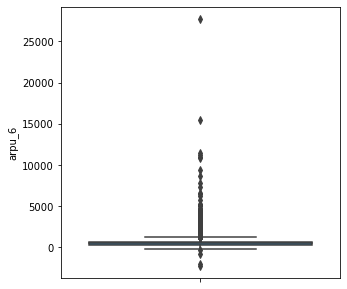

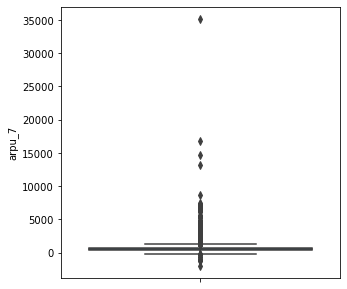

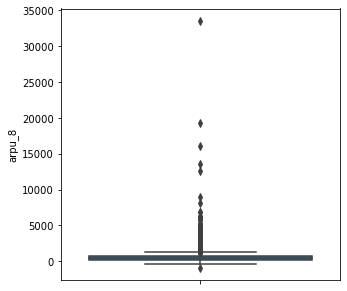

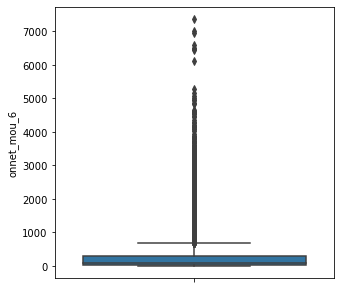

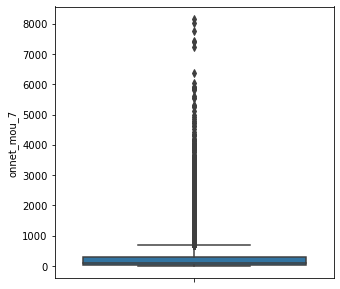

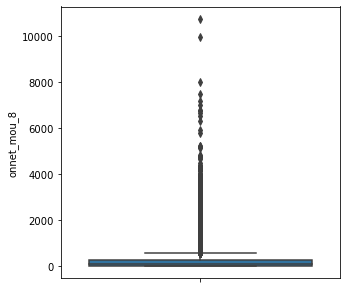

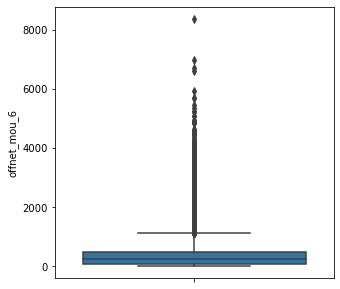

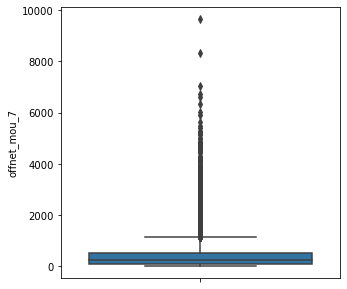

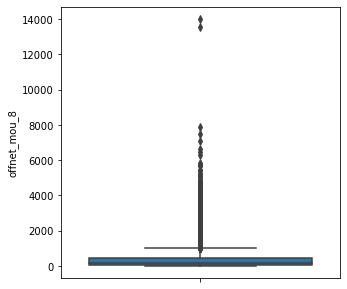

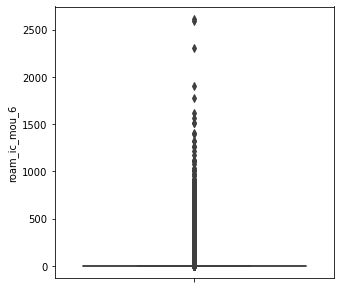

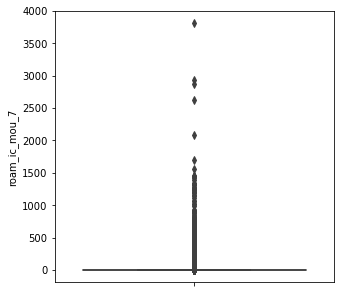

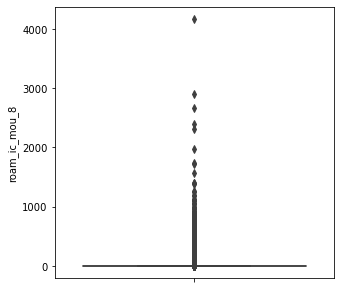

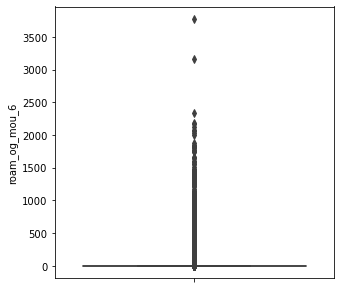

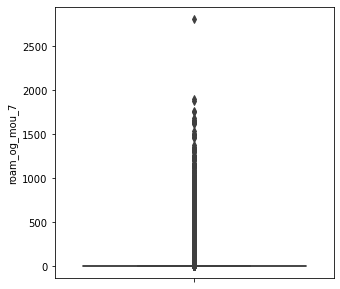

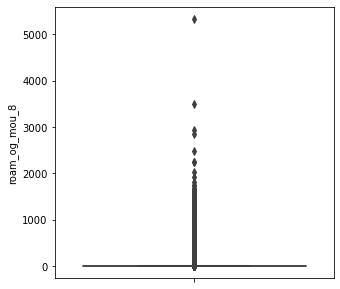

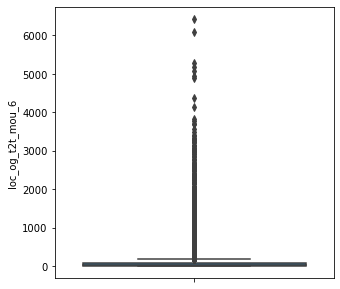

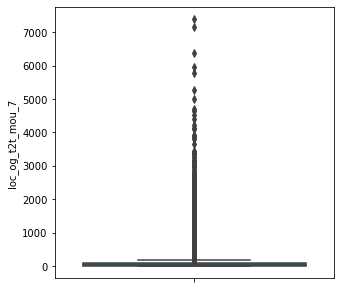

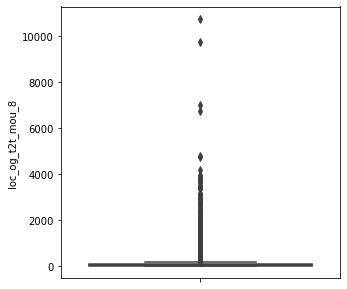

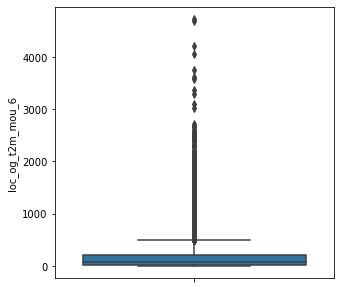

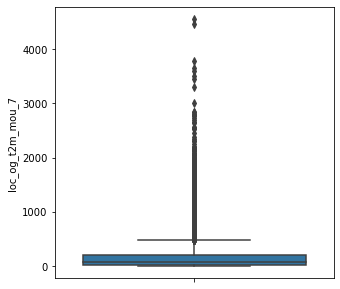

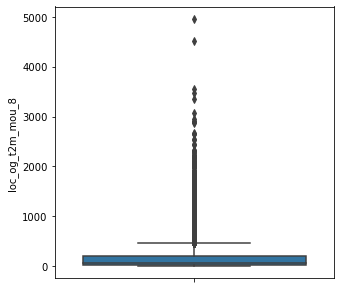

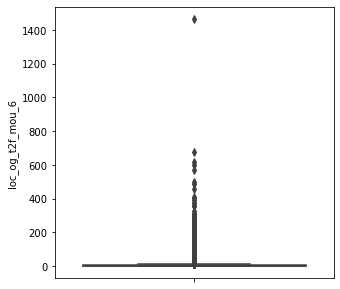

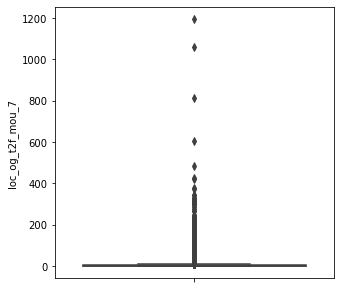

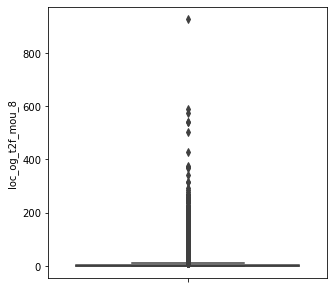

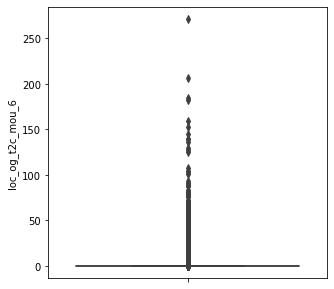

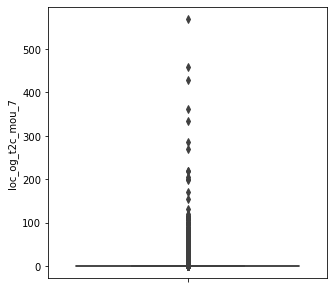

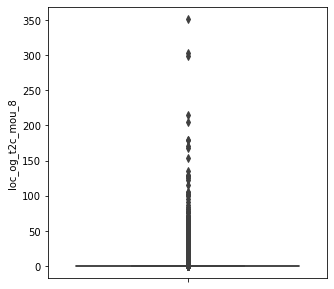

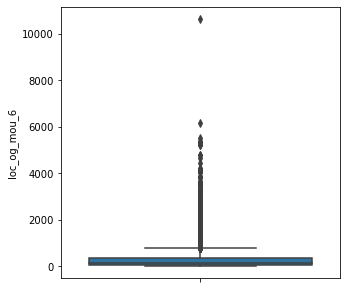

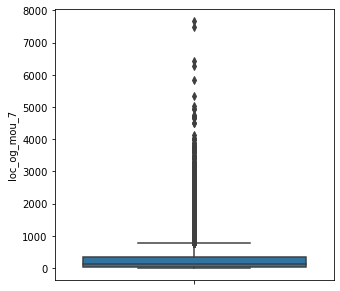

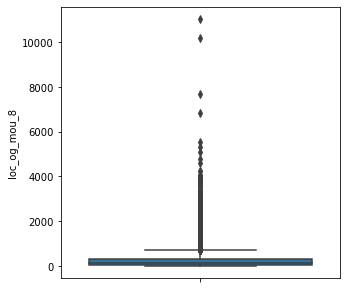

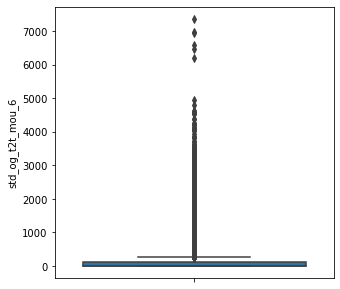

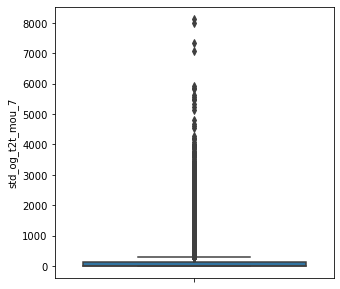

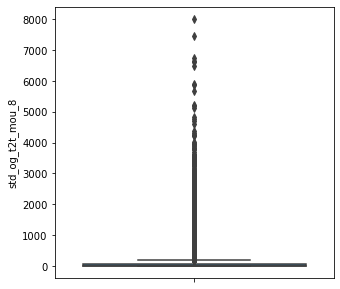

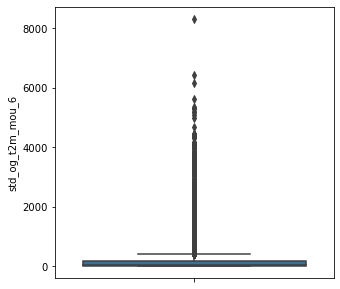

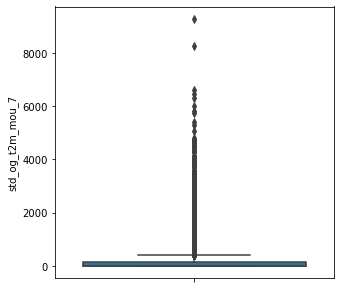

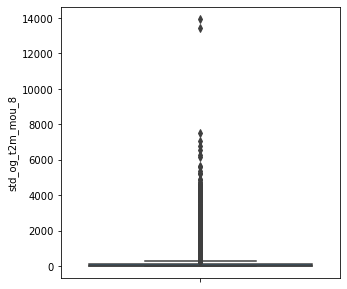

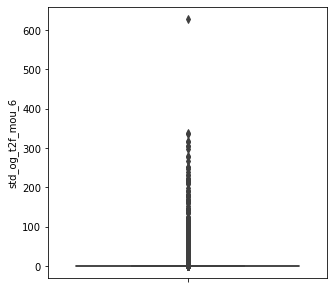

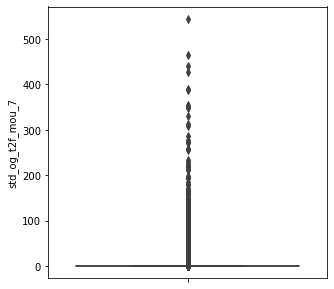

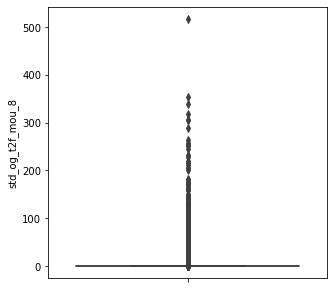

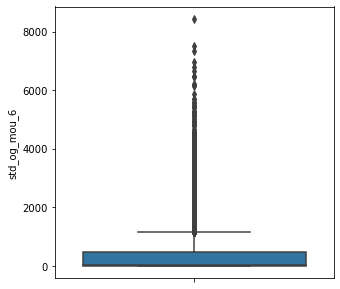

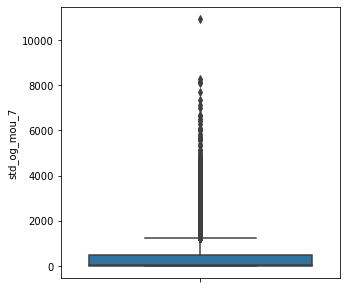

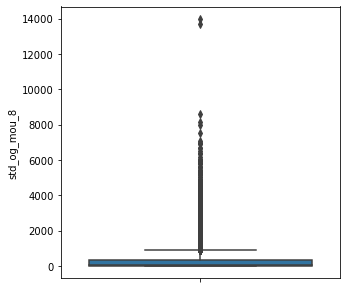

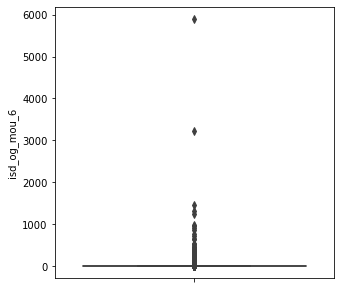

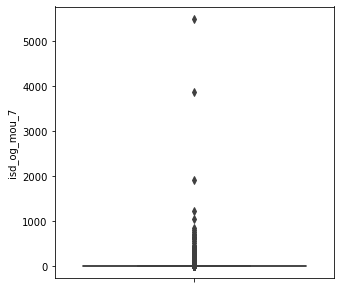

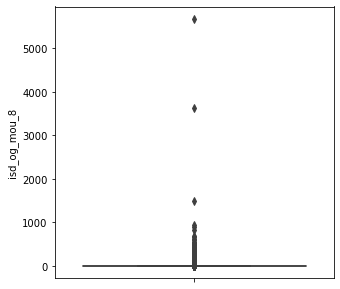

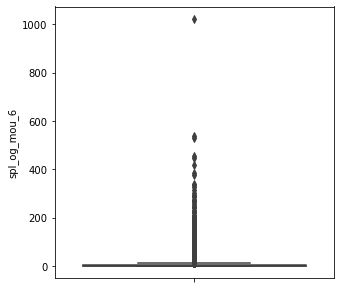

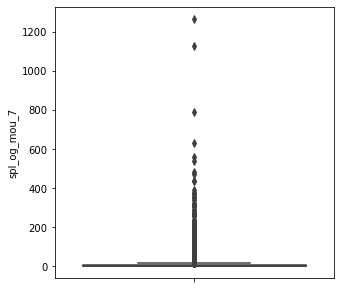

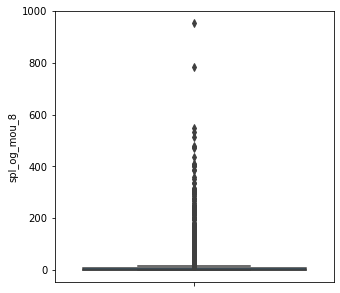

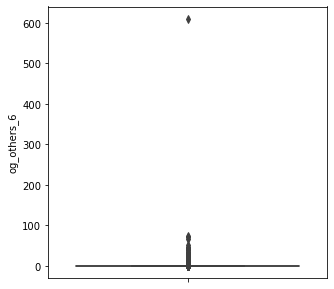

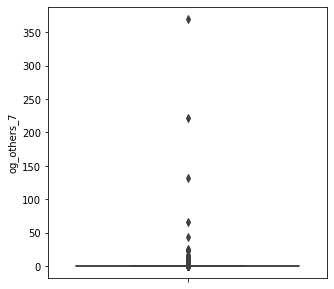

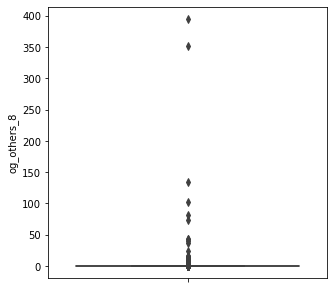

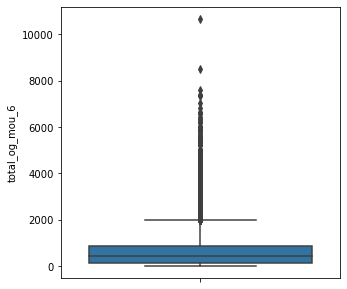

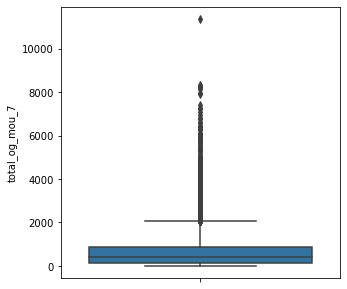

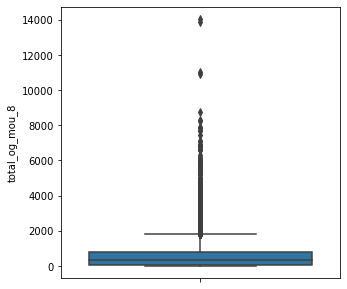

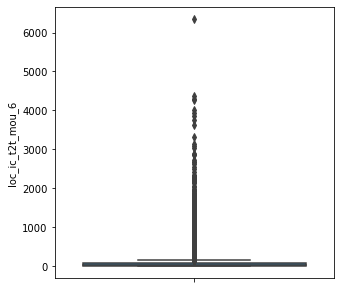

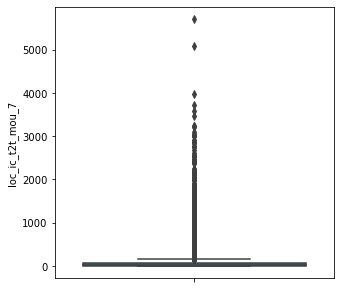

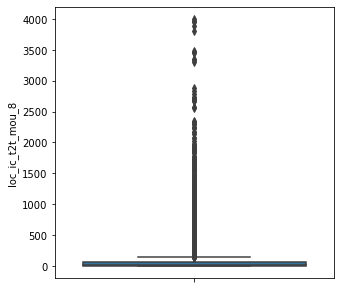

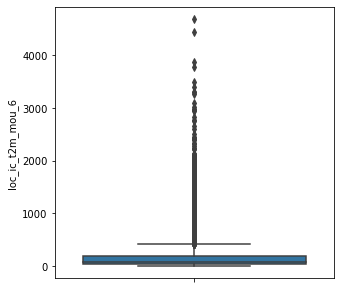

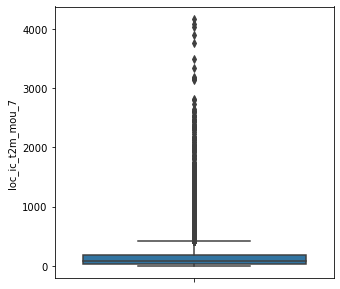

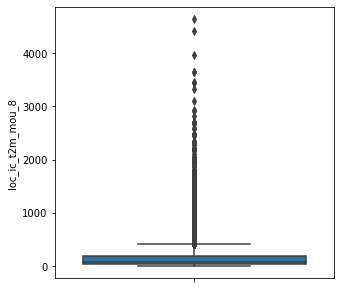

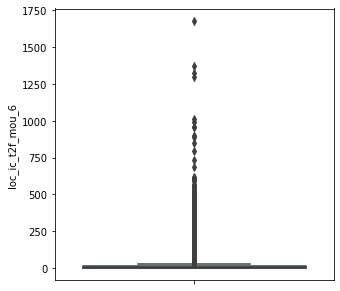

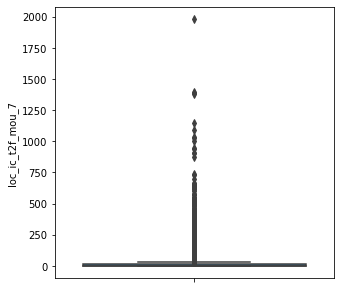

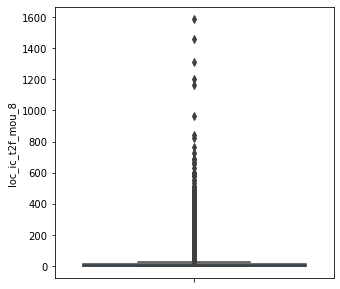

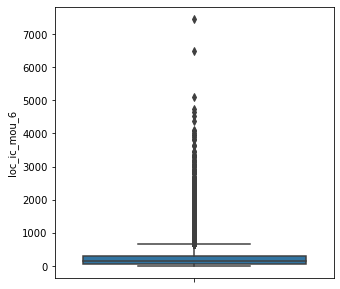

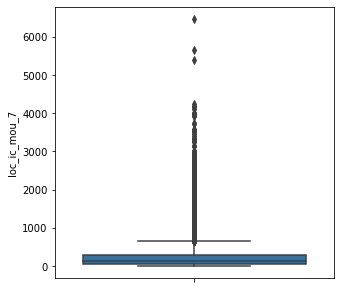

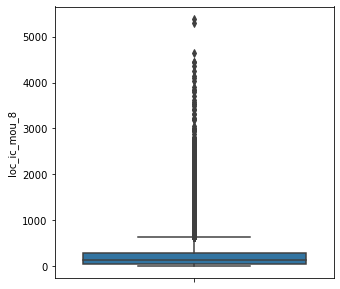

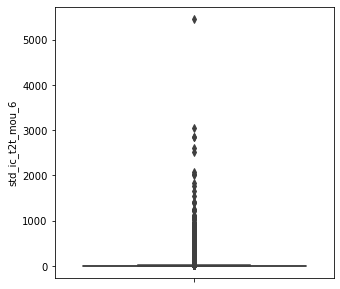

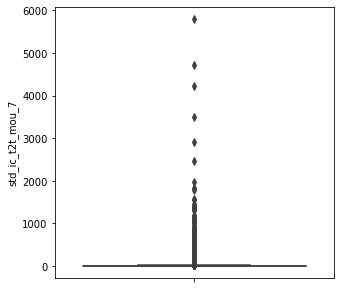

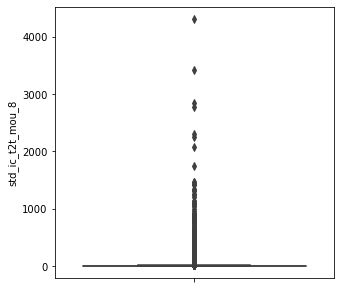

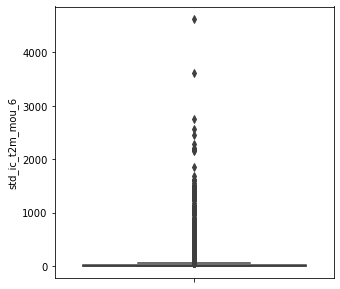

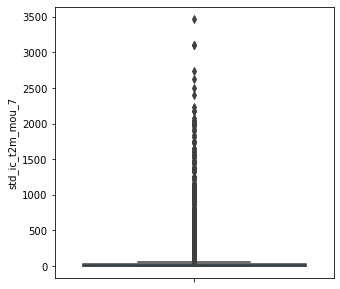

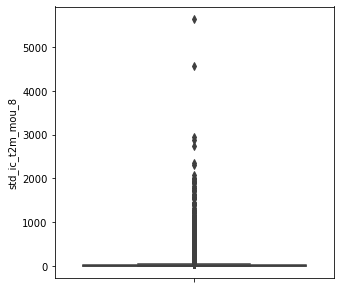

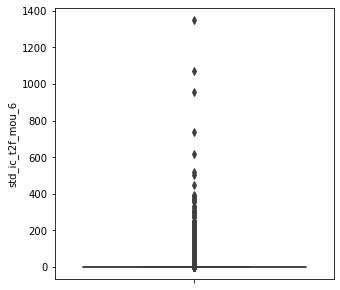

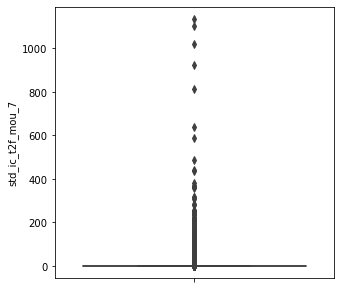

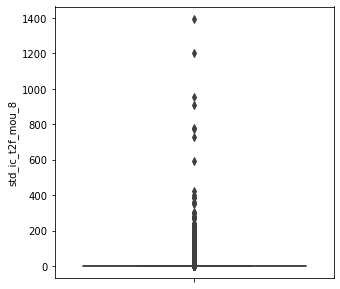

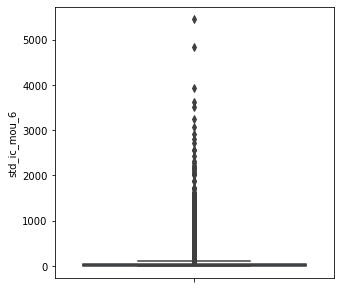

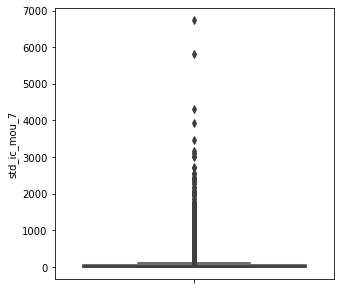

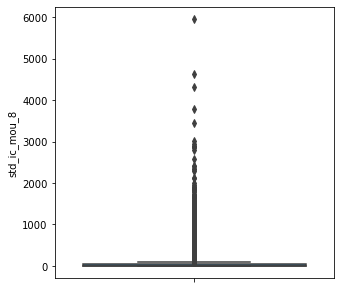

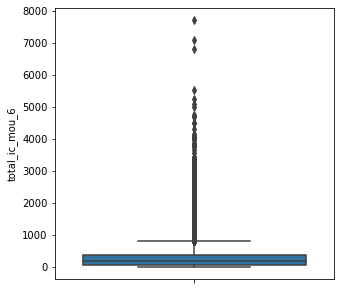

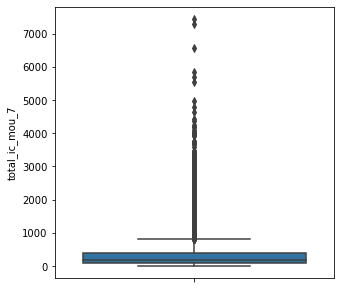

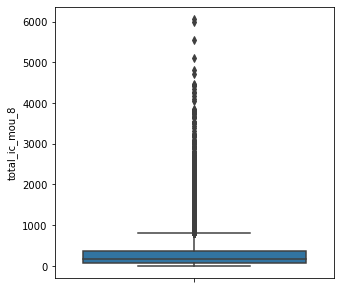

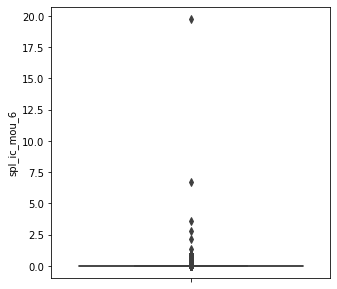

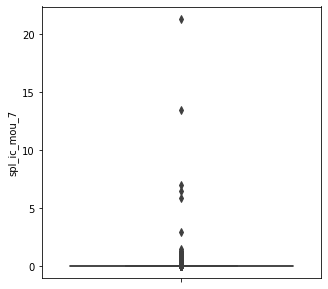

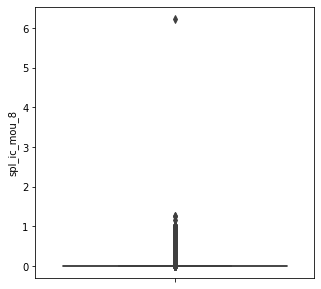

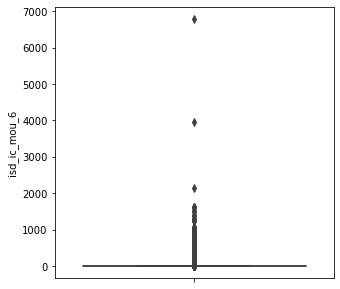

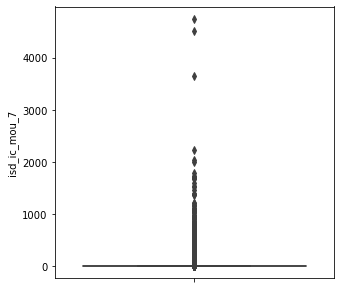

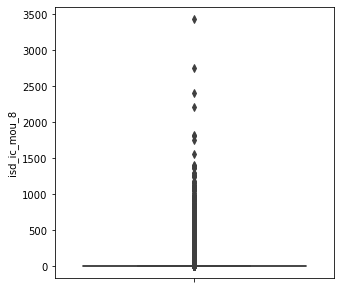

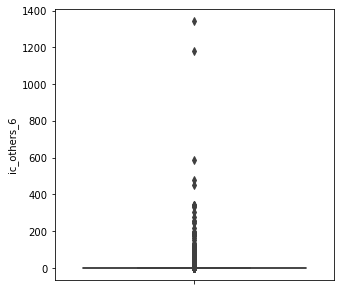

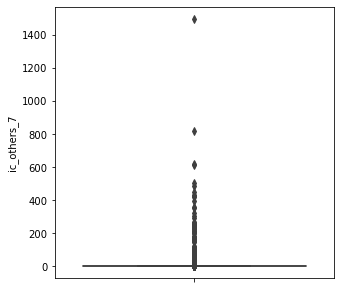

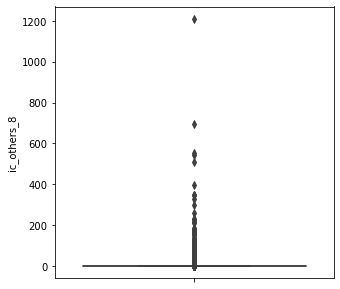

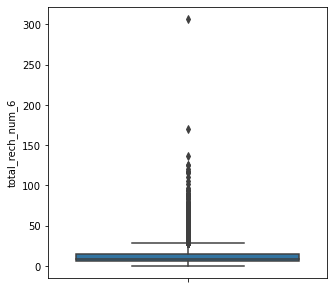

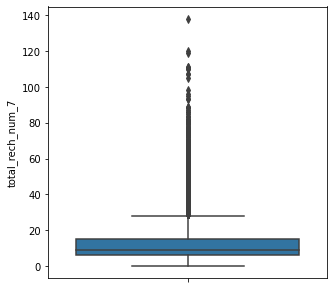

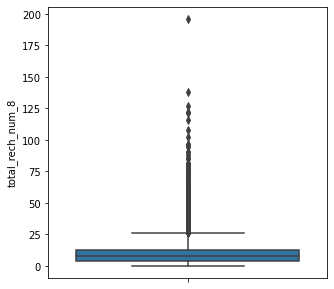

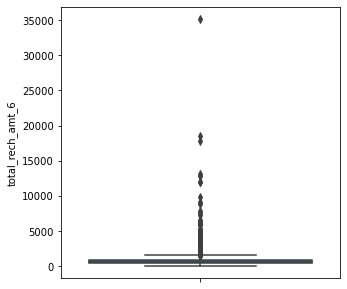

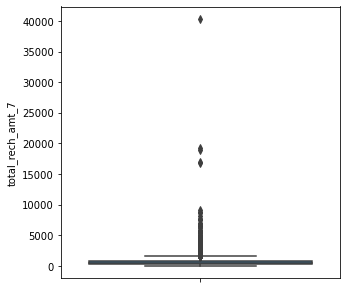

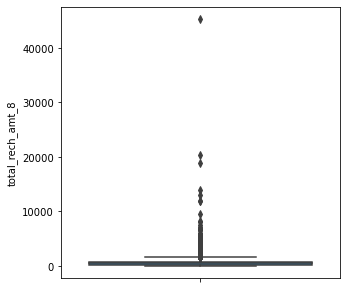

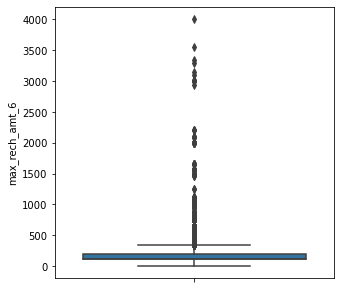

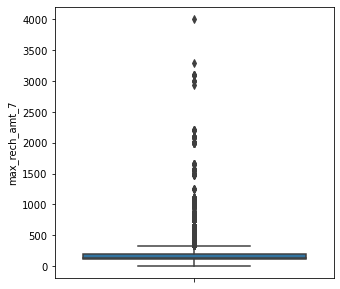

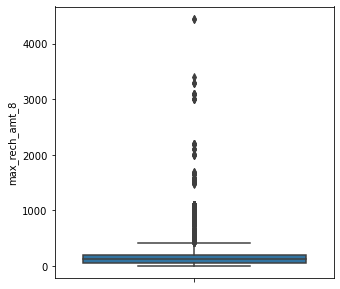

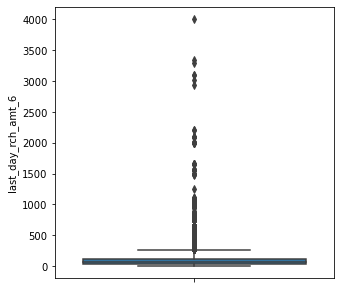

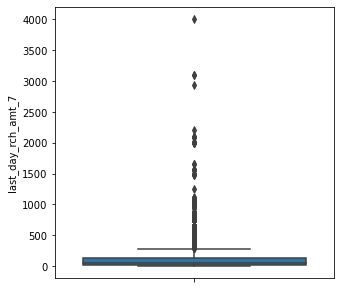

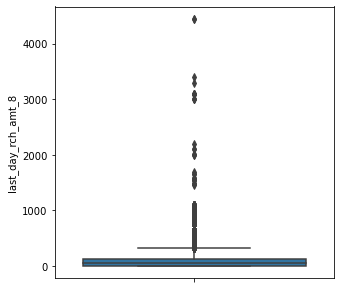

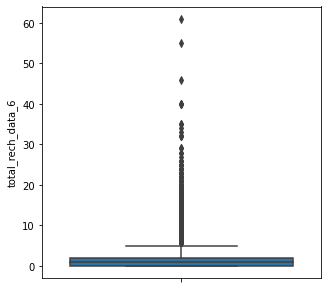

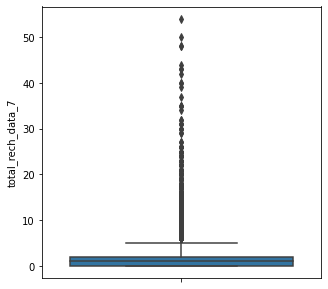

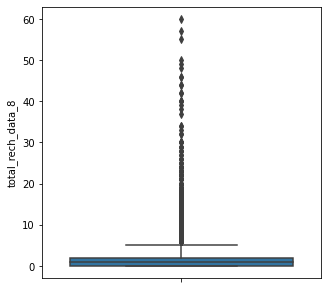

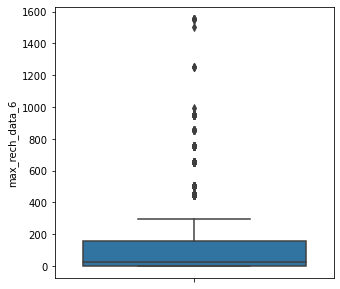

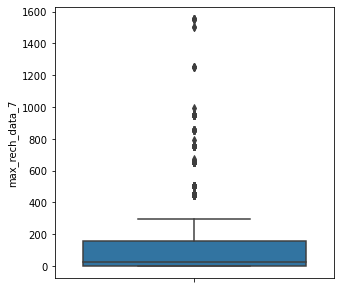

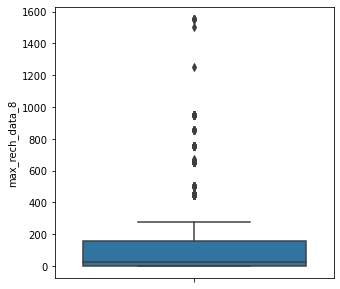

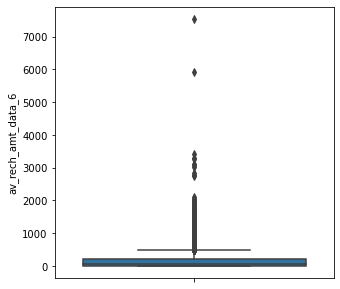

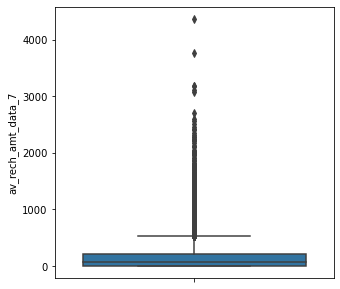

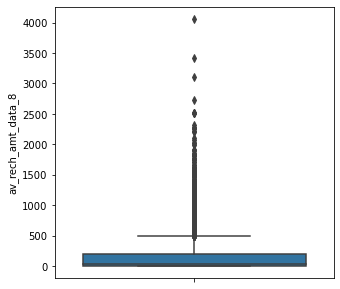

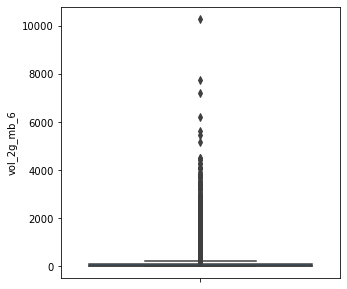

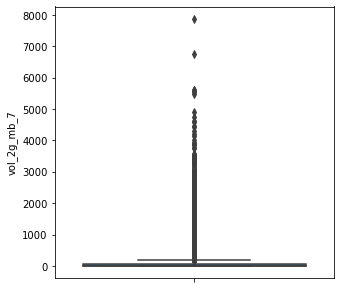

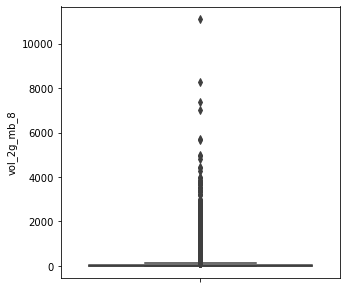

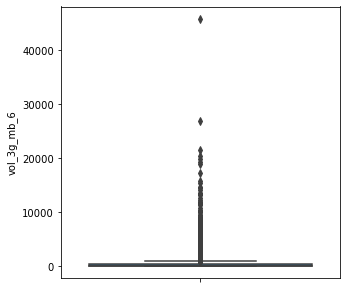

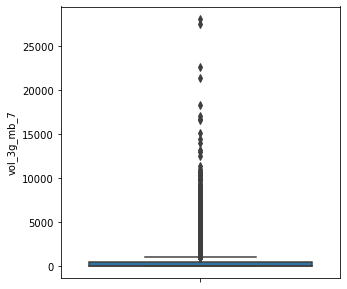

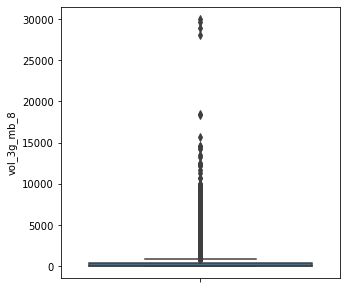

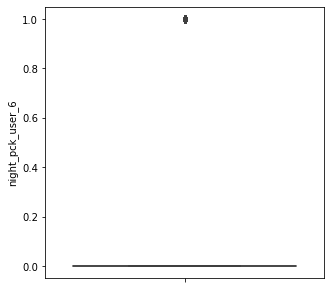

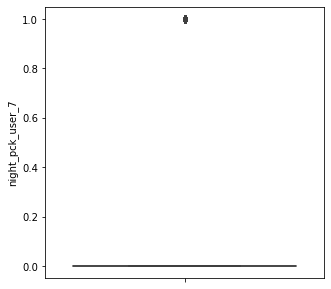

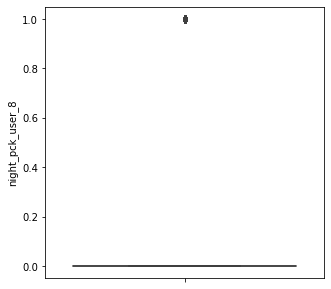

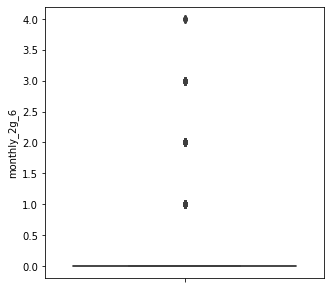

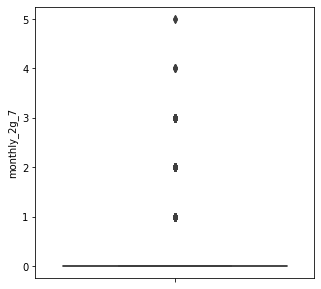

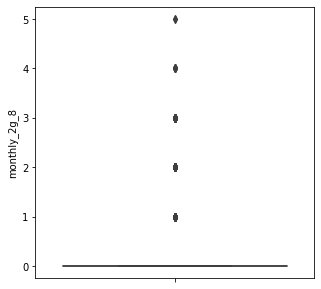

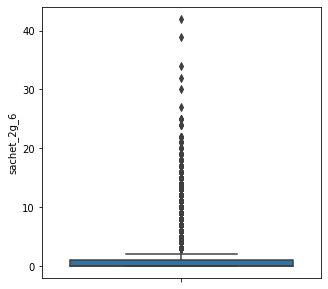

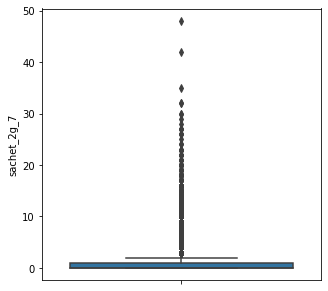

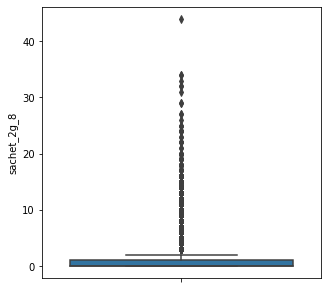

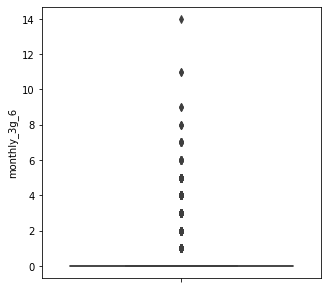

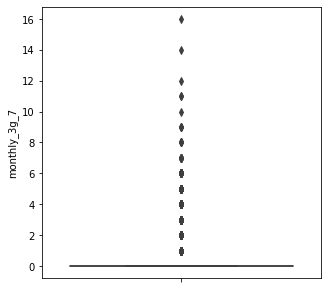

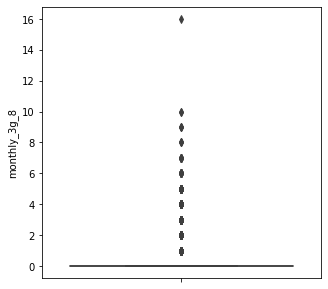

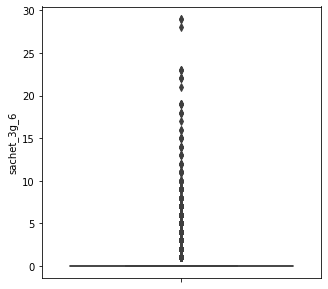

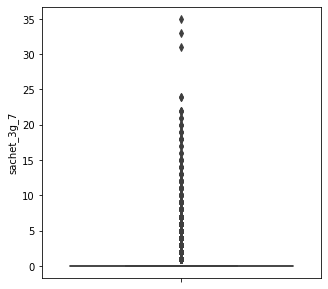

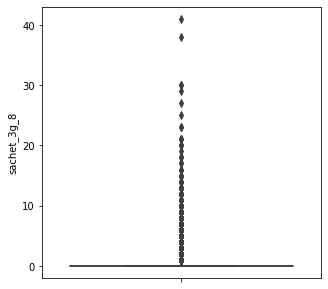

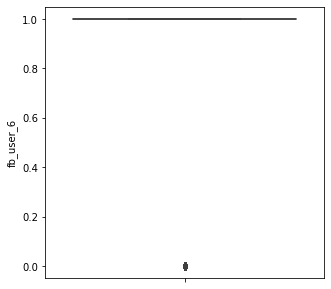

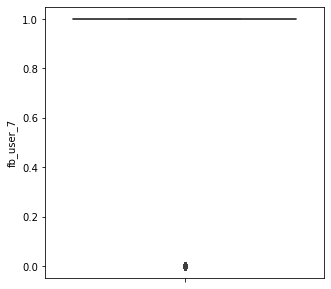

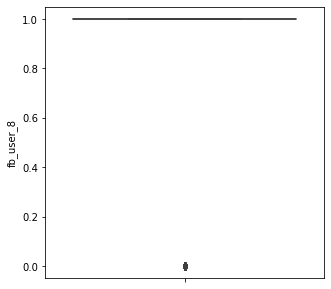

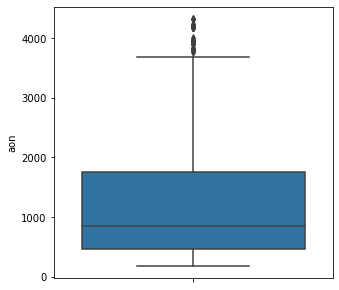

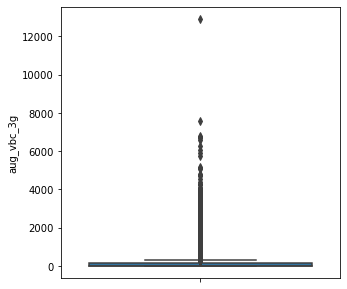

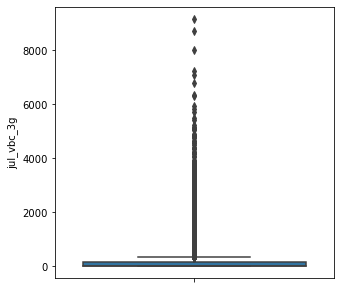

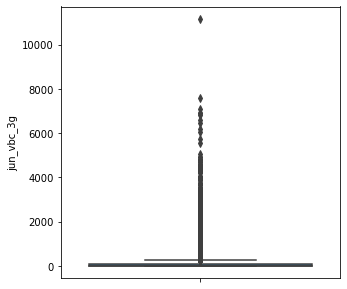

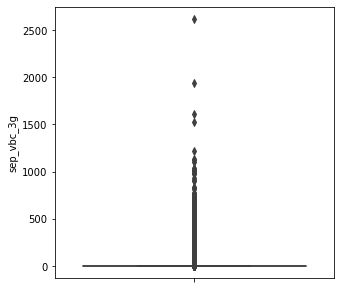

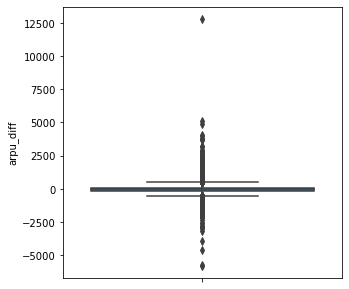

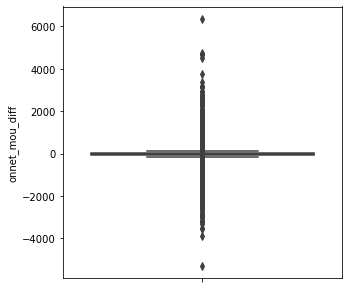

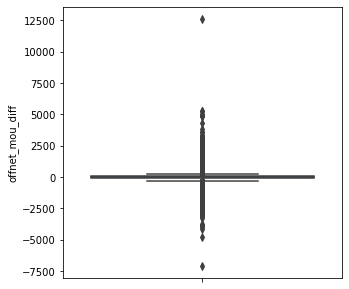

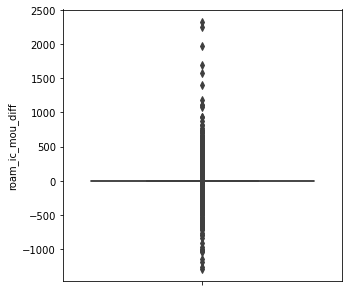

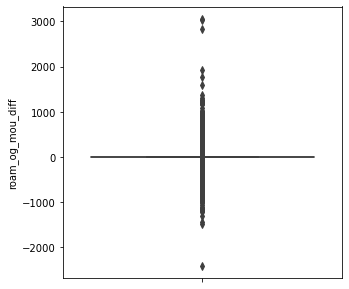

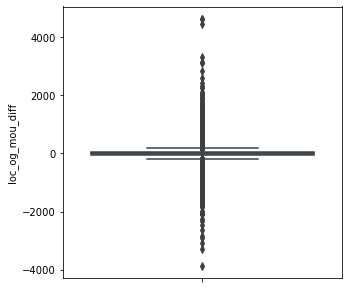

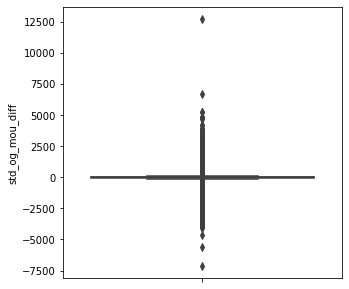

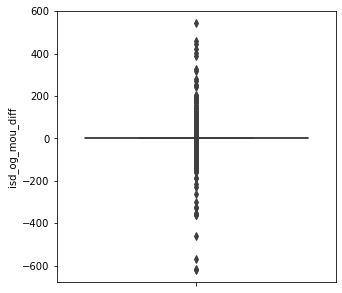

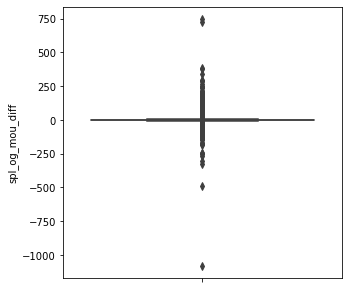

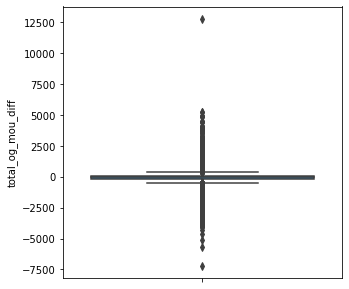

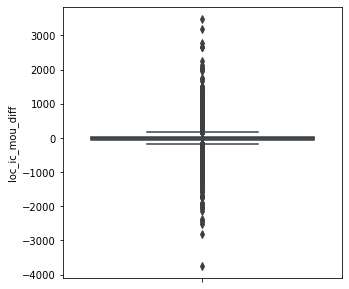

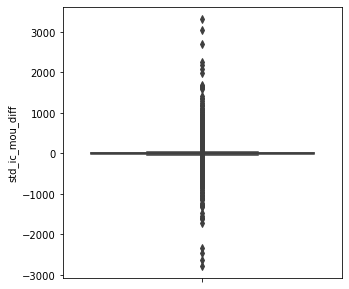

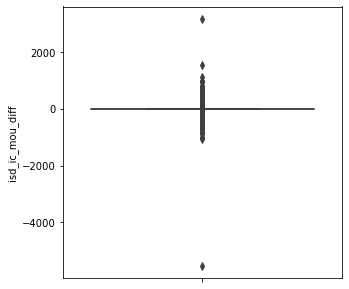

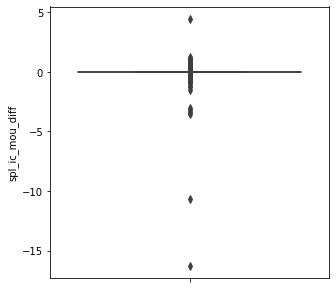

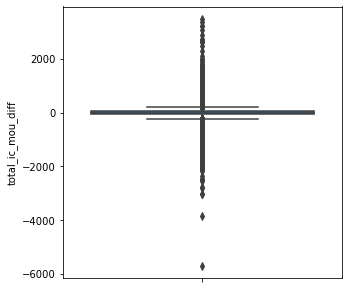

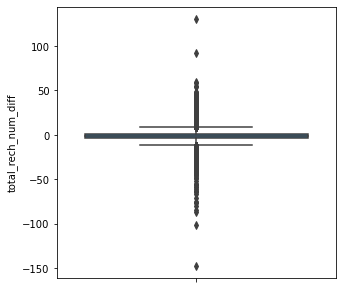

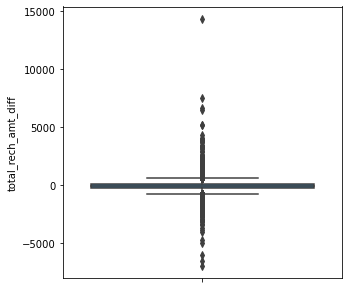

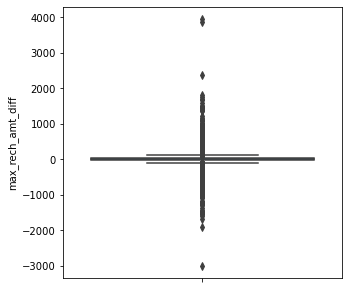

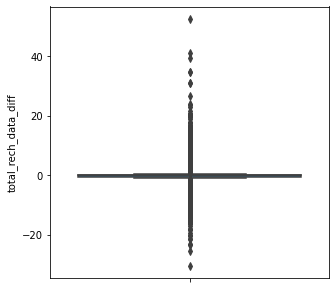

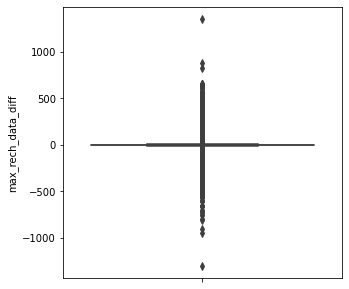

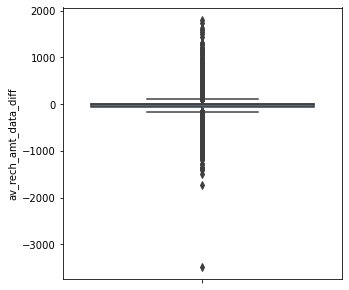

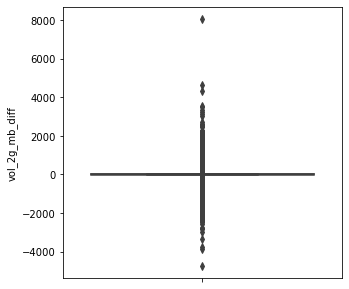

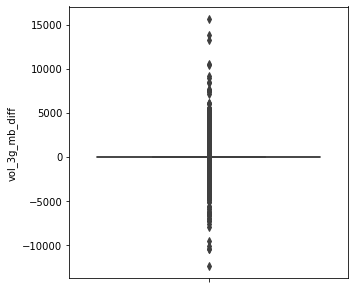

In [29]:
# Plot boxplot for each and every columns other than churn 
cont_cols = [col for col in telecom_filter.columns if col not in ['churn']]
for col in cont_cols:
    plt.figure(figsize=(5, 5))
    sns.boxplot(y=col, data=telecom_filter)
    plt.show()

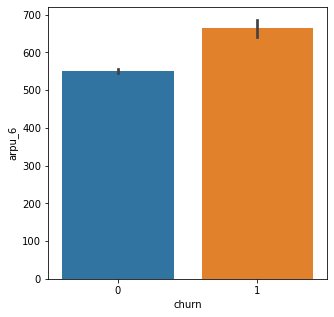

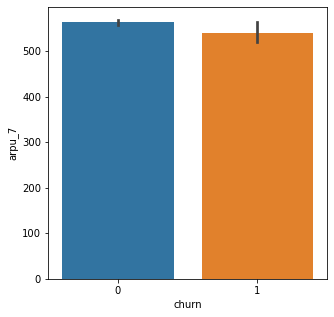

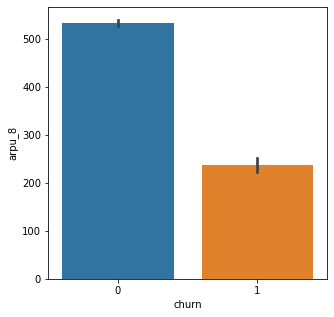

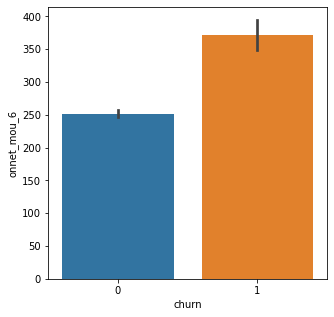

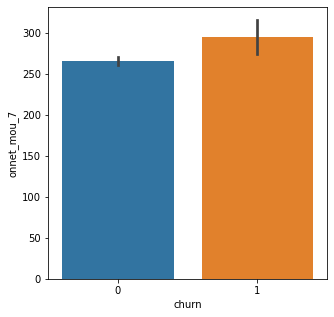

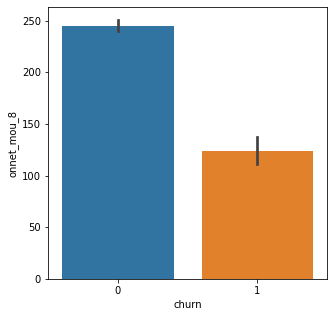

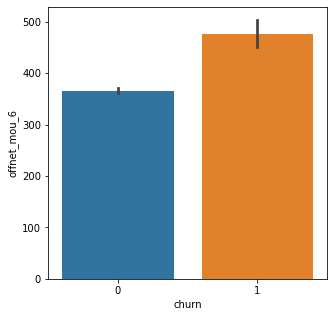

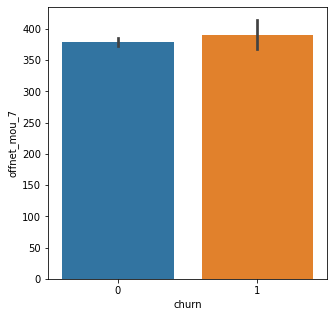

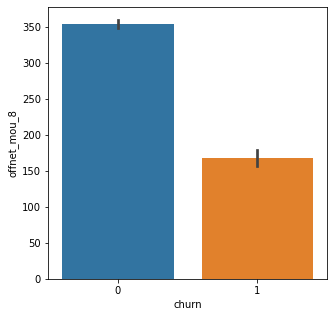

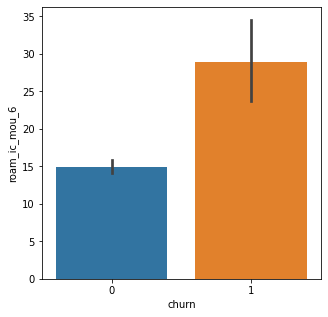

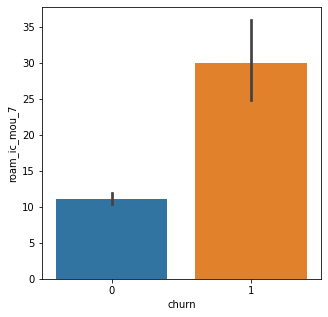

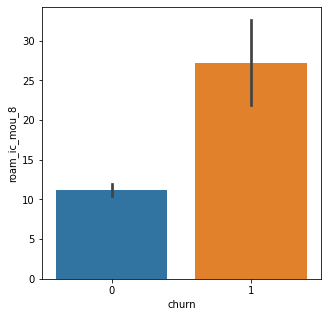

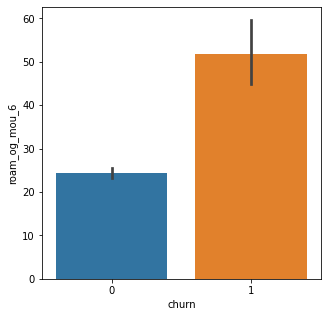

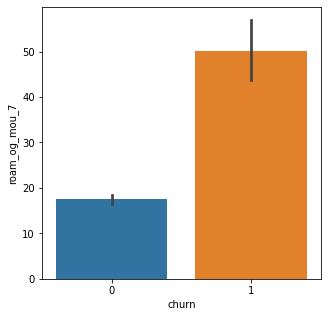

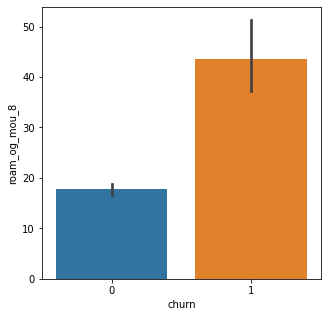

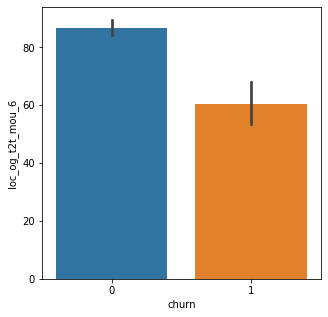

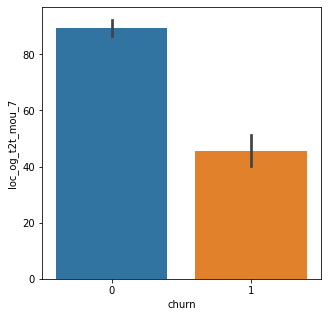

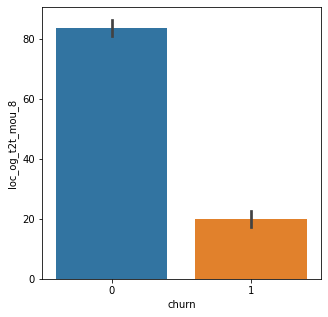

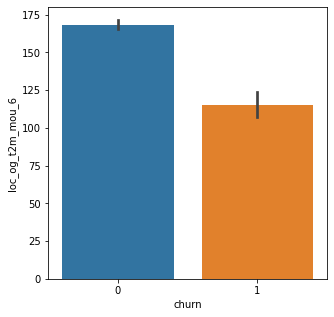

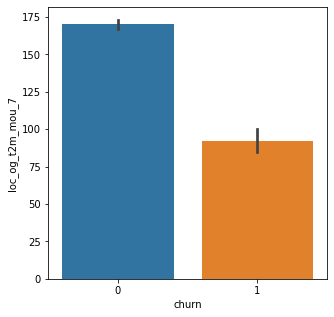

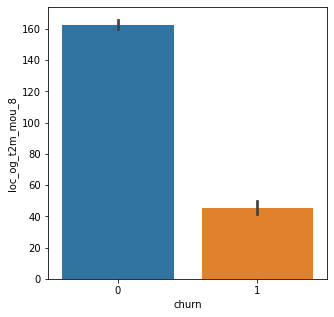

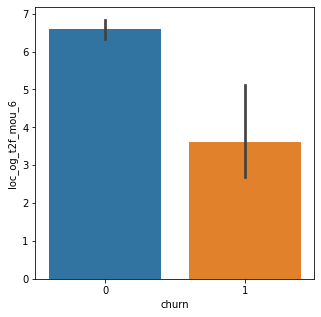

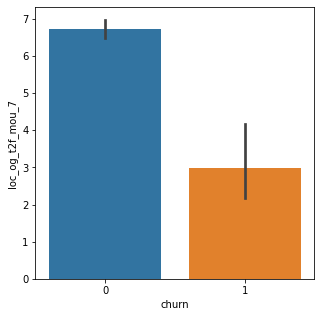

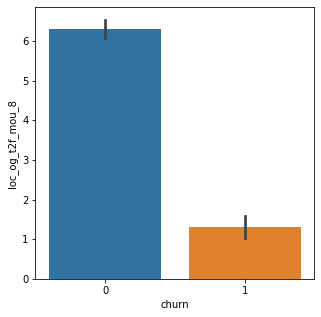

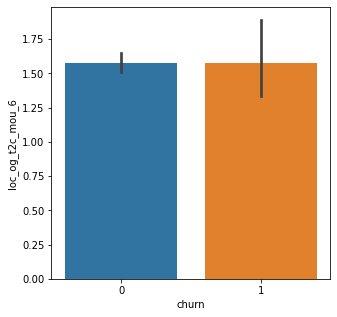

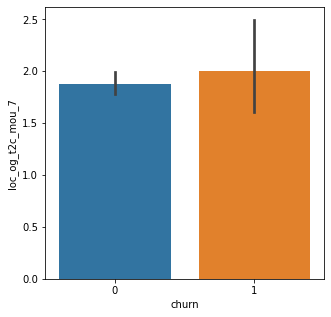

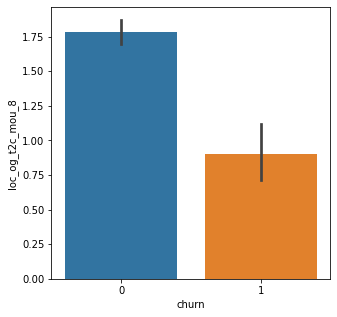

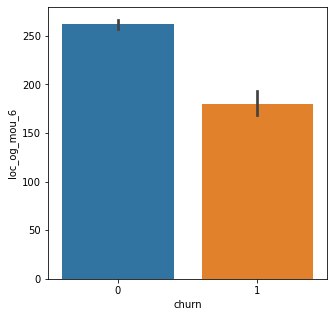

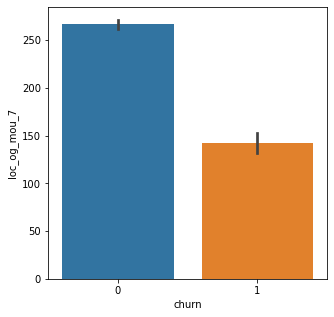

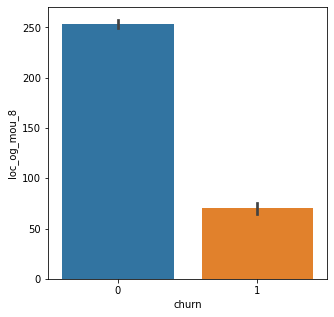

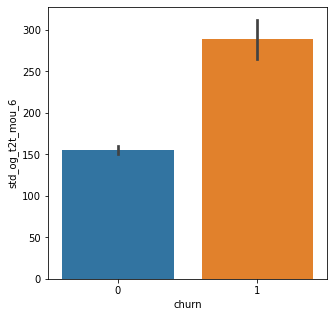

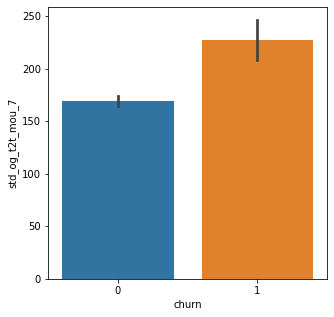

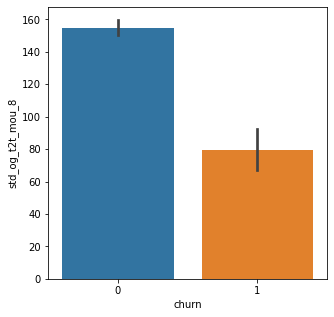

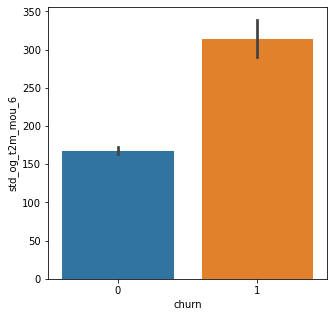

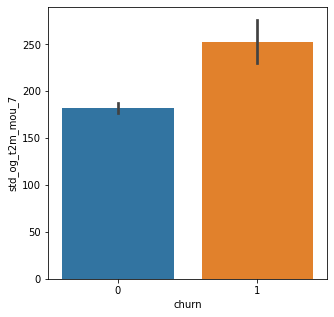

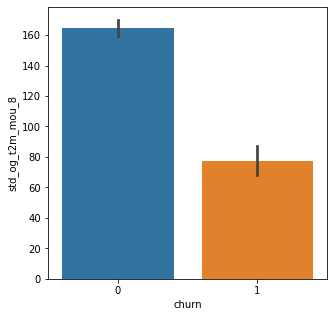

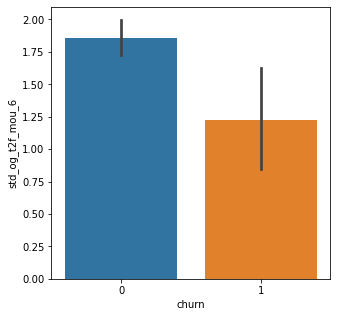

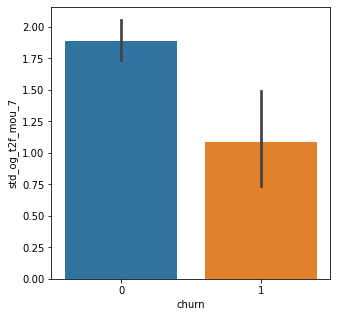

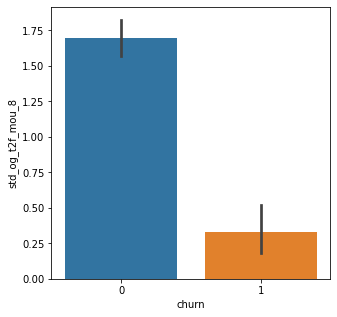

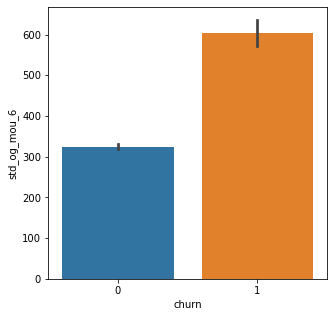

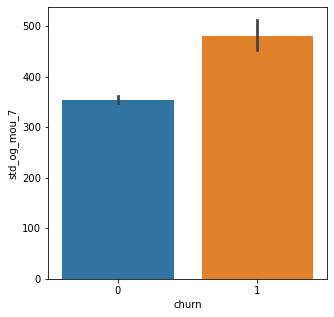

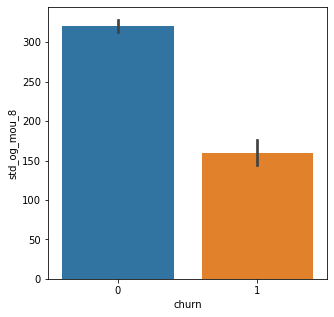

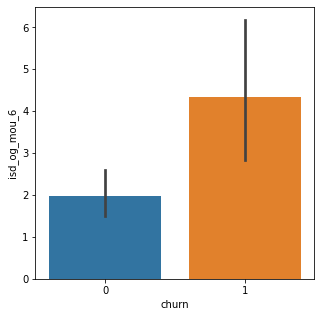

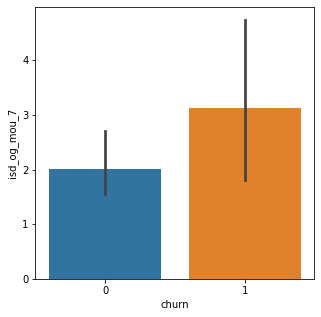

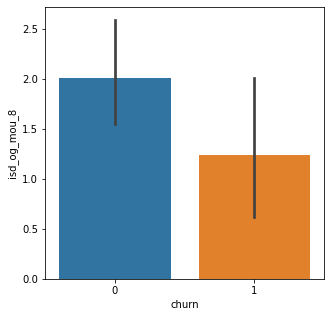

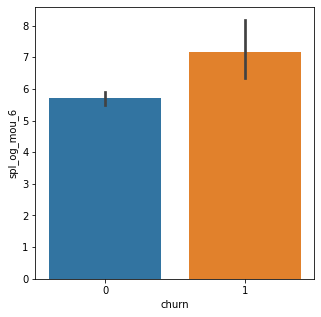

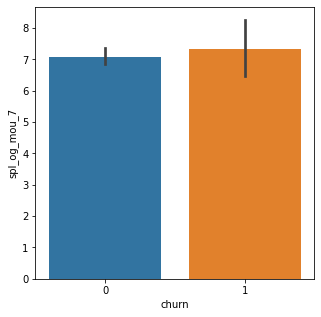

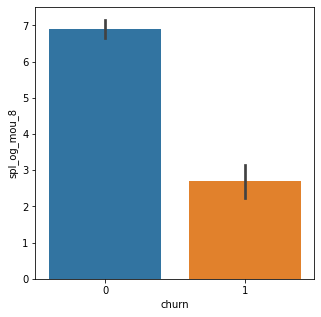

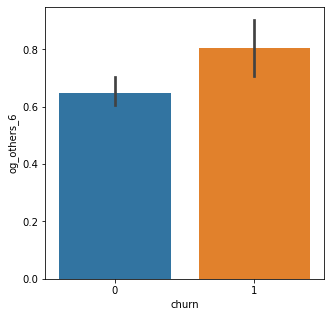

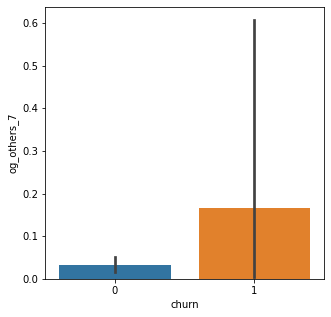

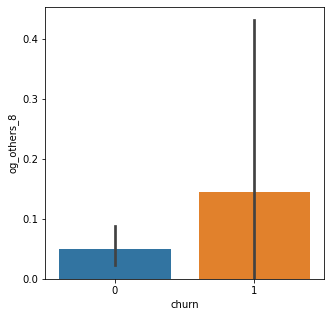

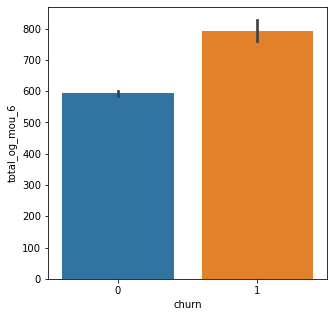

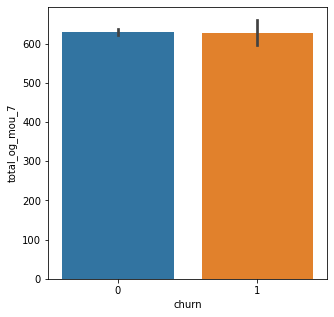

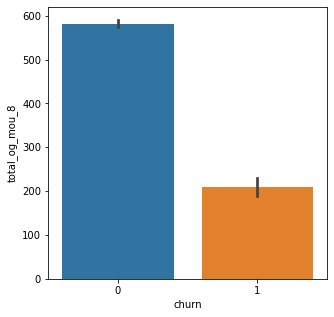

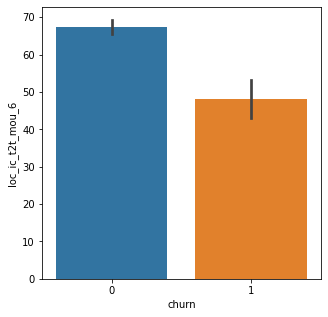

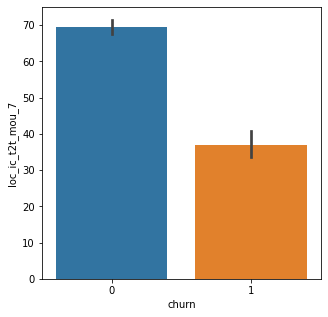

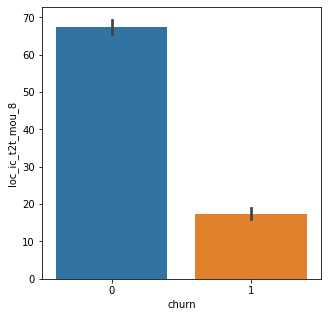

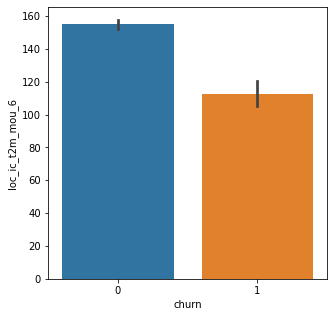

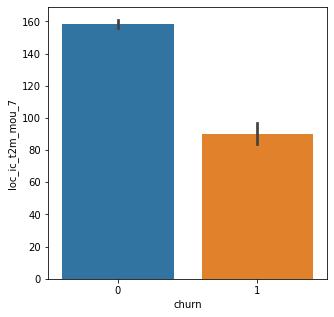

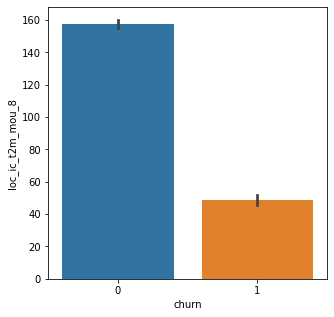

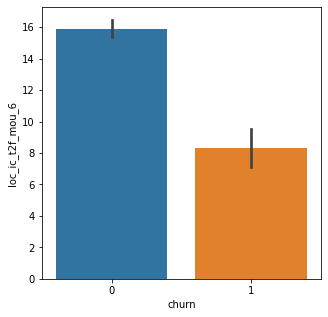

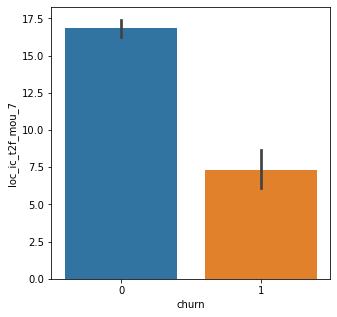

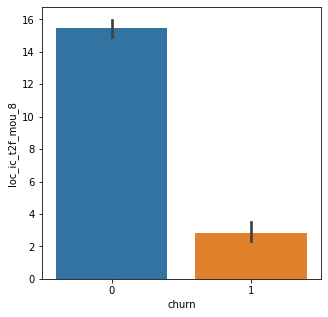

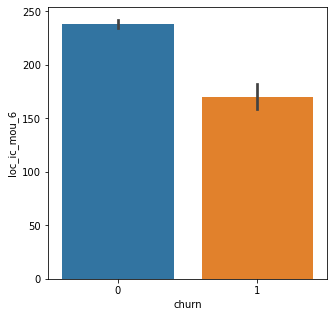

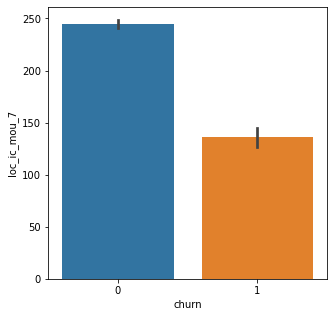

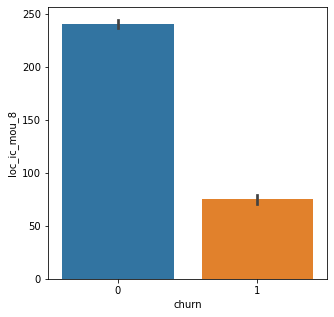

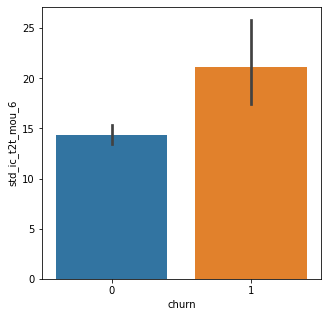

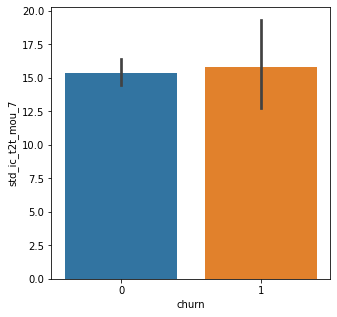

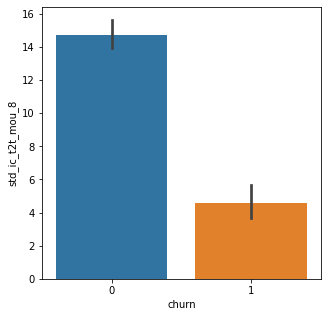

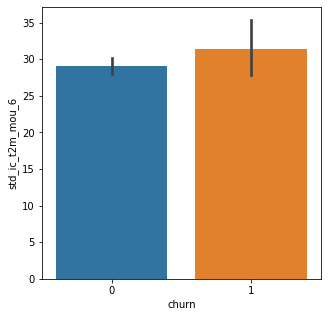

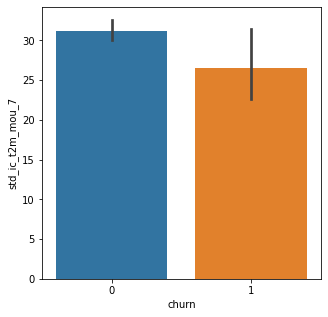

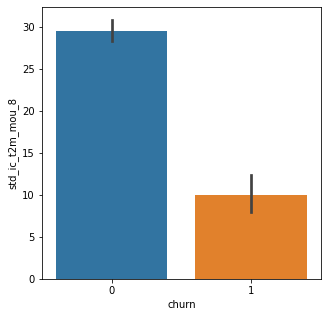

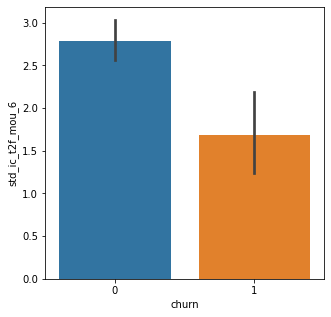

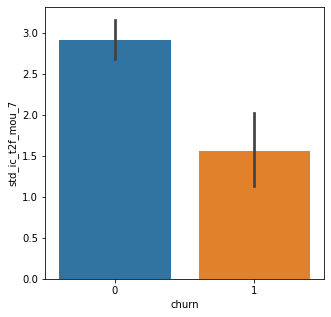

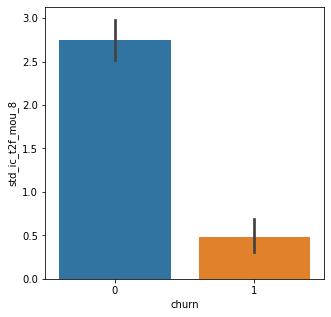

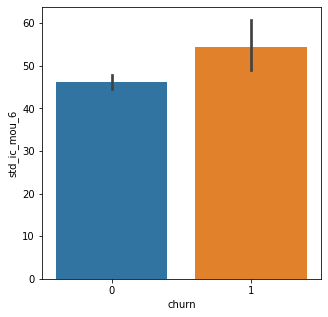

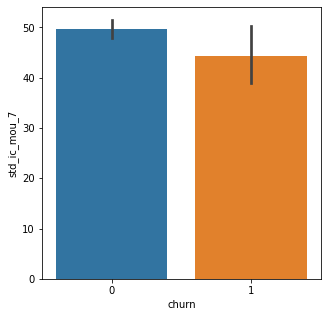

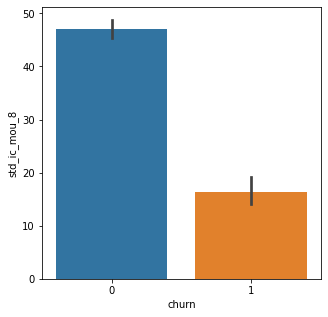

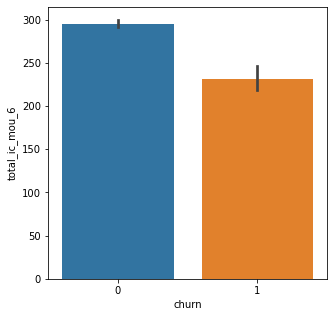

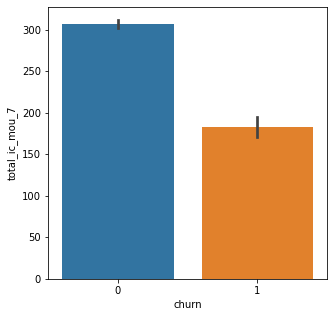

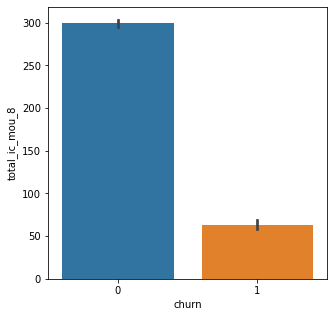

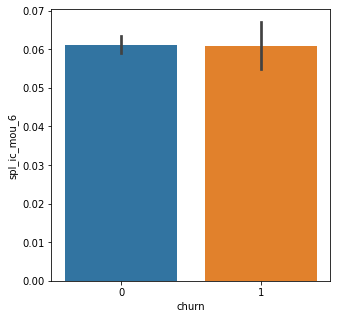

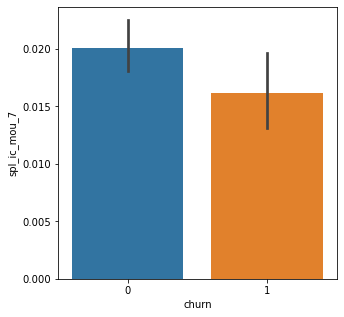

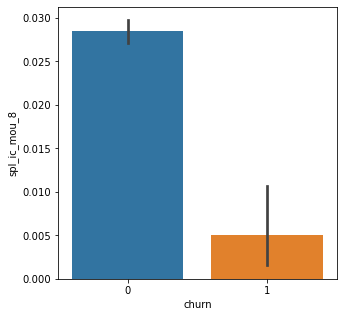

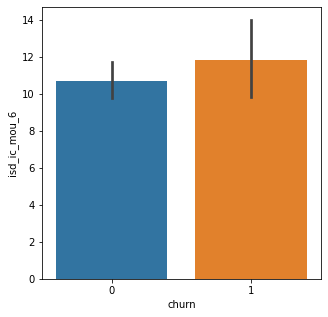

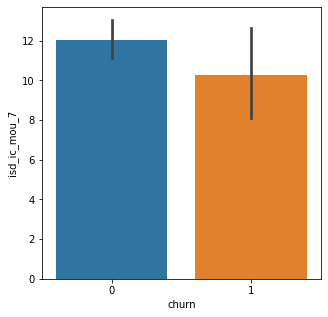

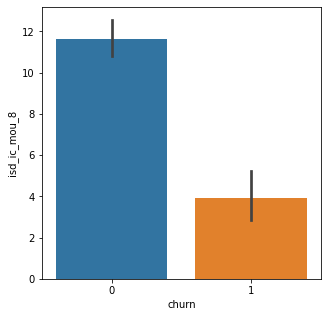

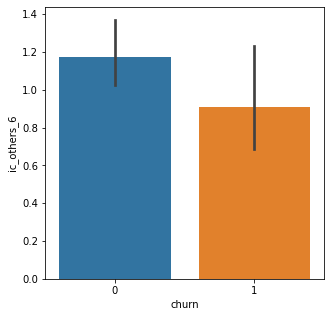

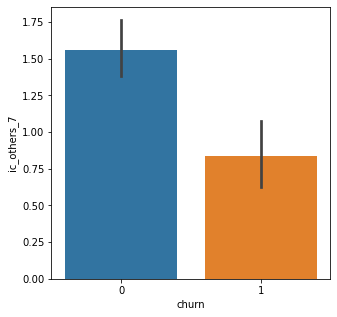

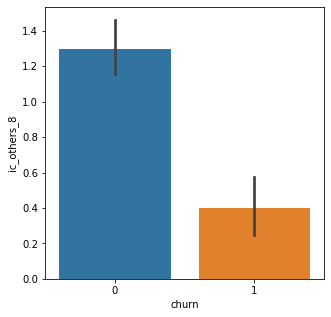

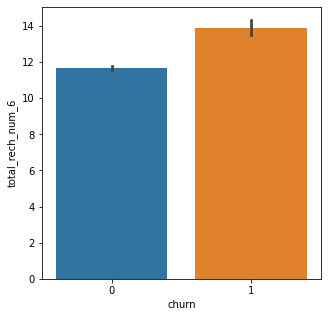

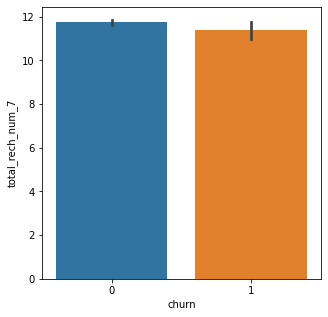

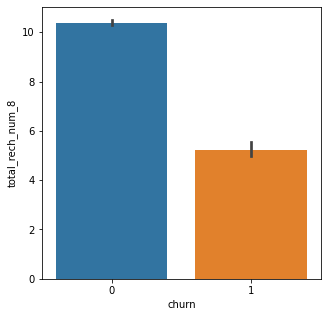

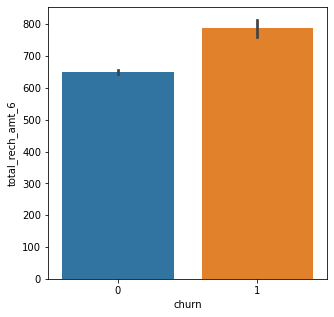

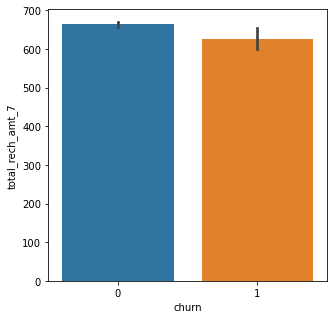

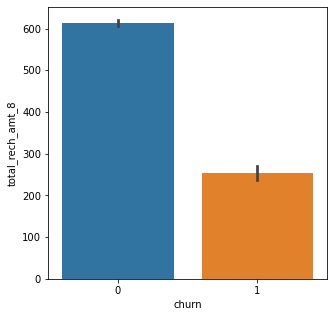

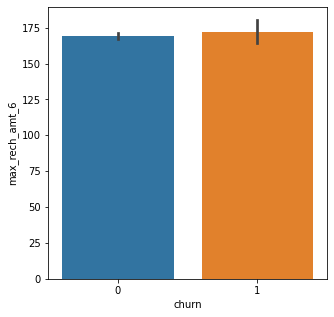

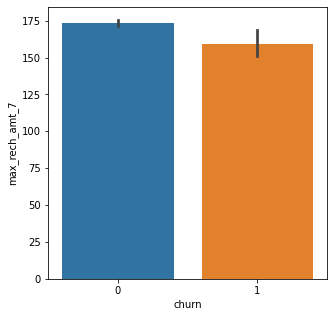

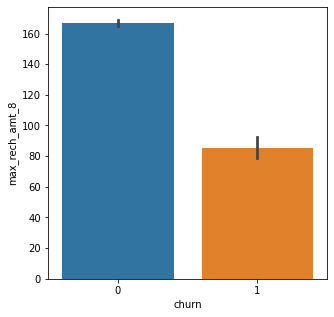

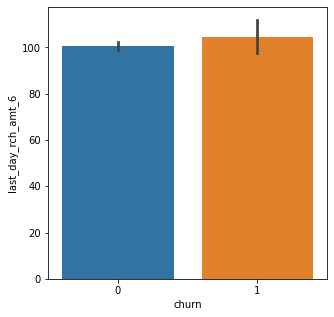

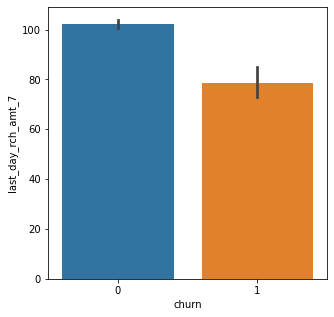

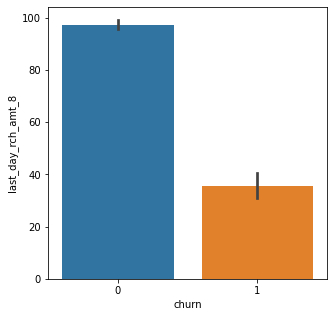

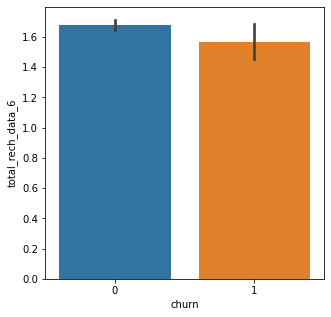

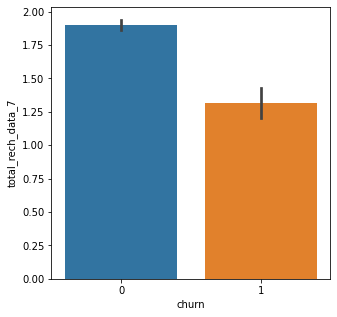

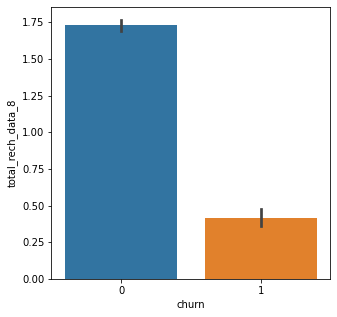

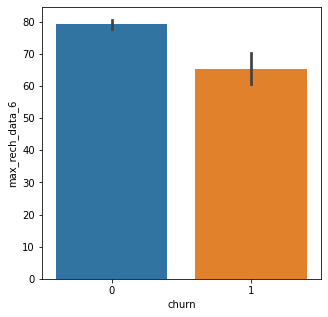

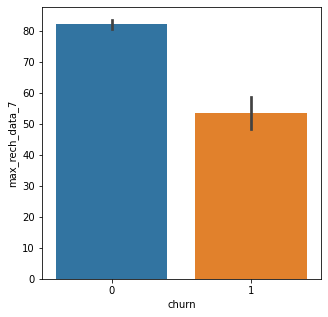

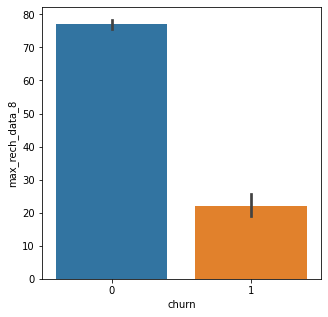

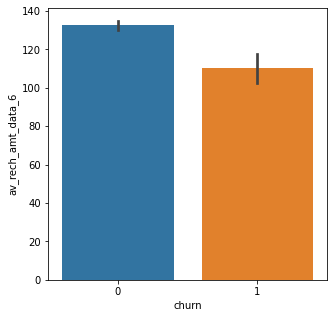

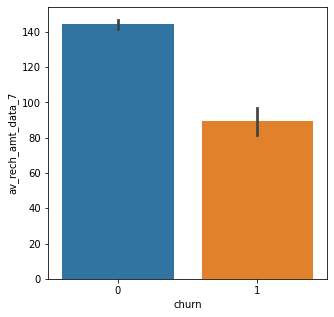

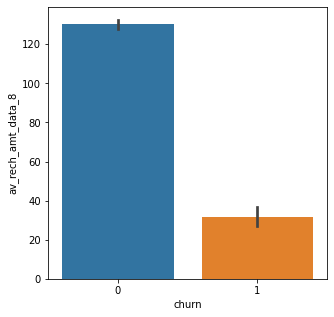

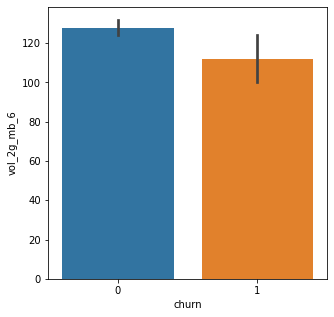

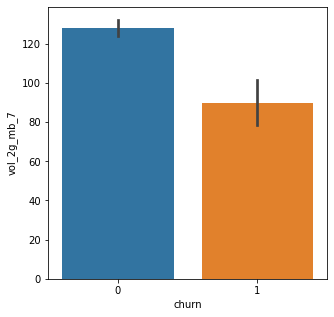

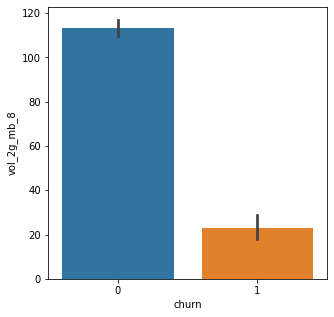

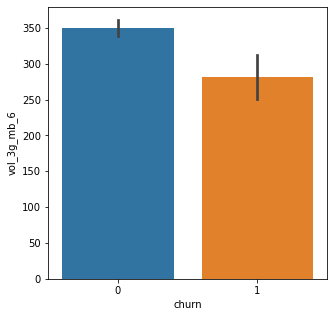

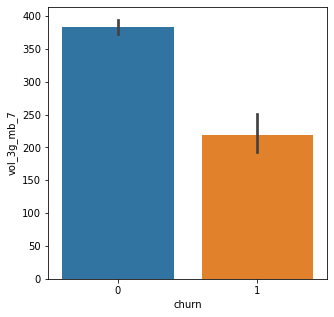

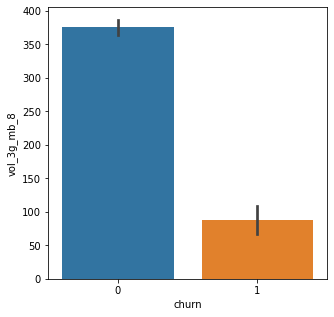

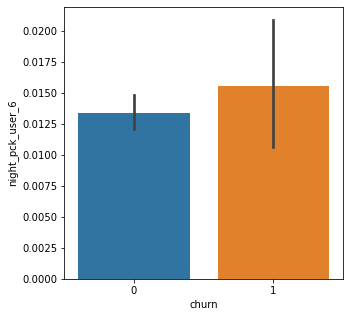

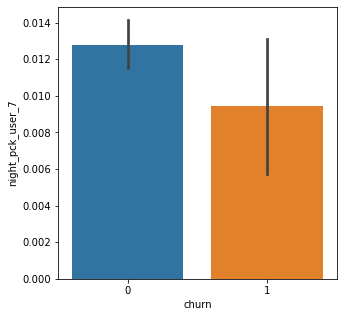

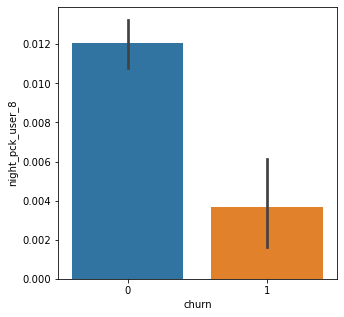

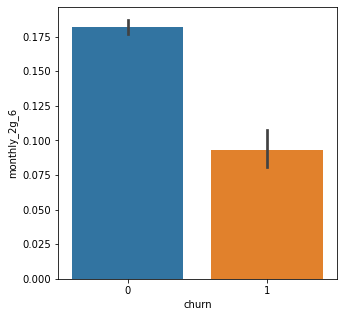

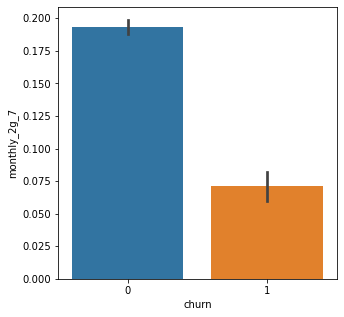

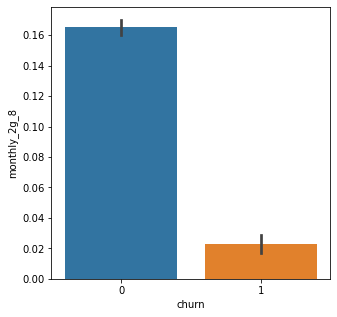

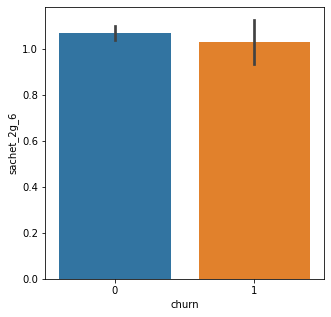

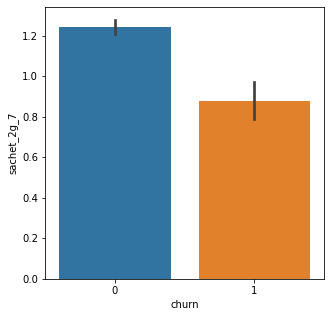

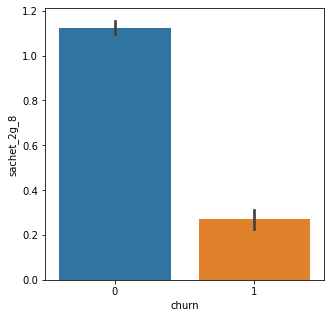

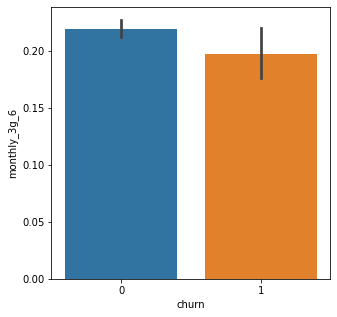

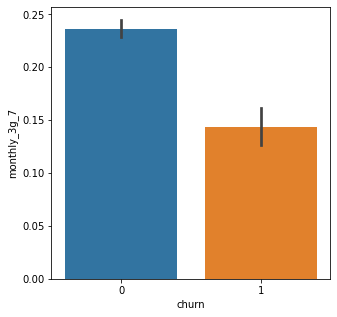

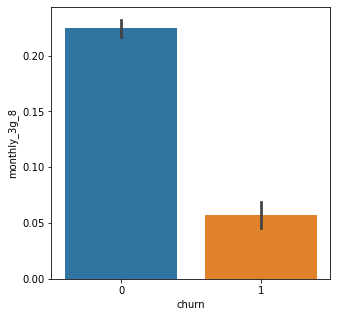

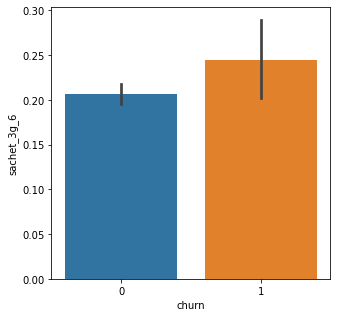

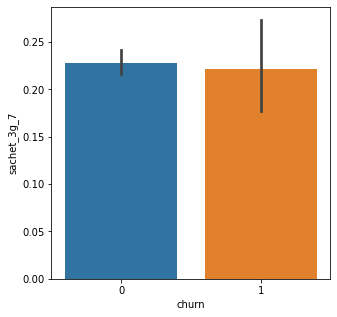

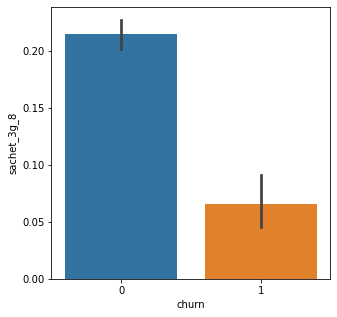

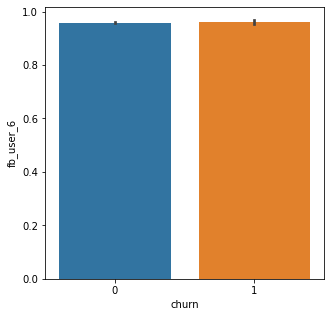

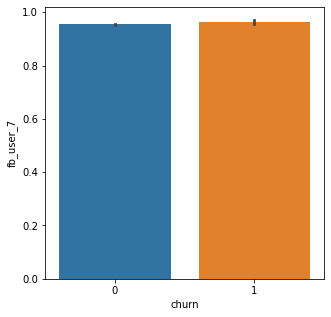

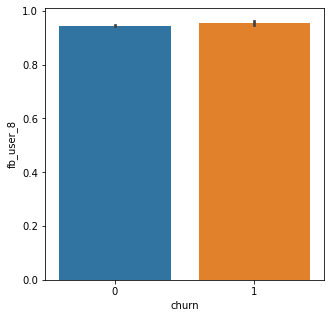

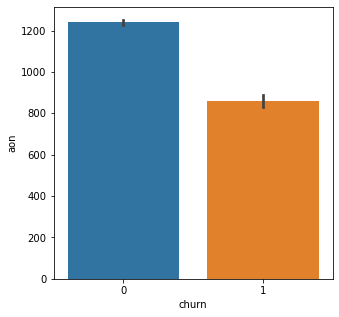

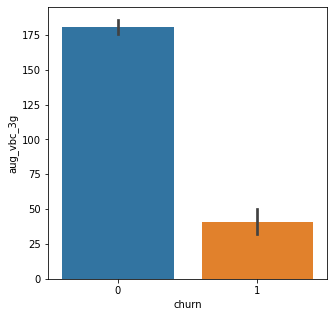

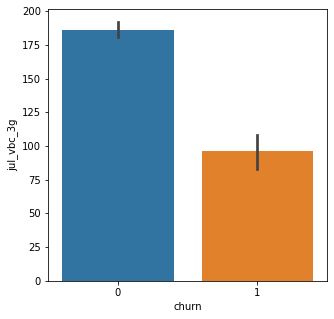

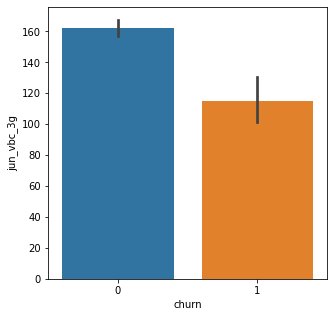

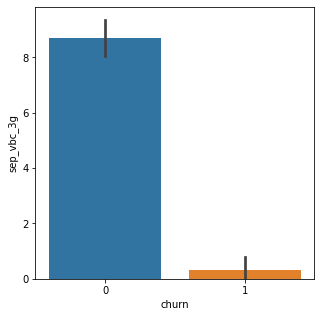

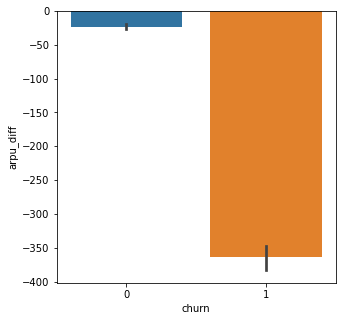

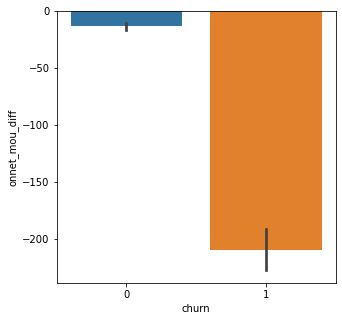

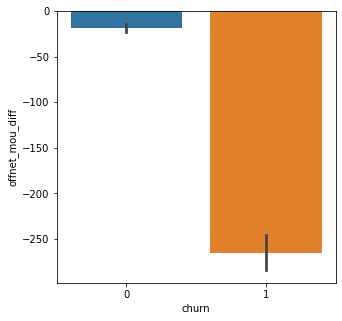

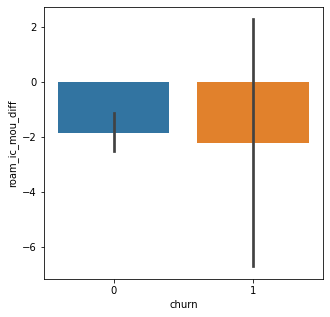

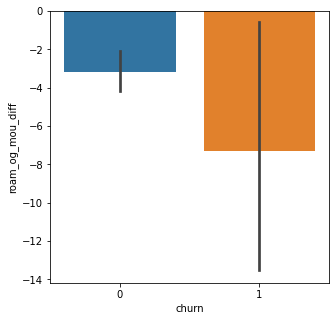

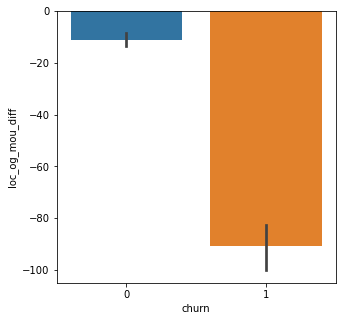

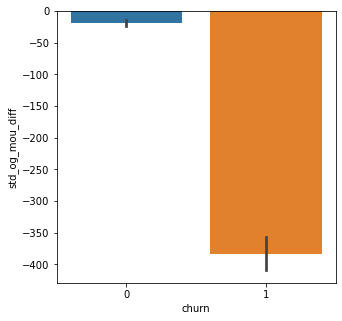

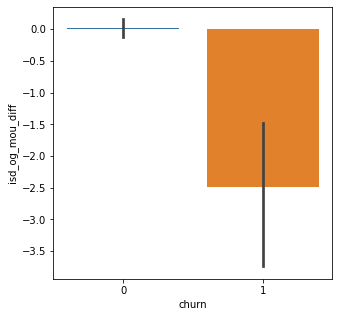

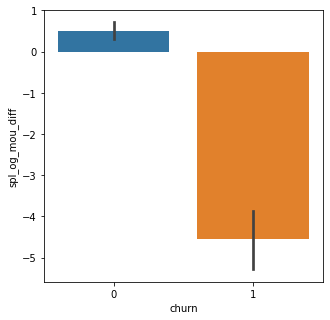

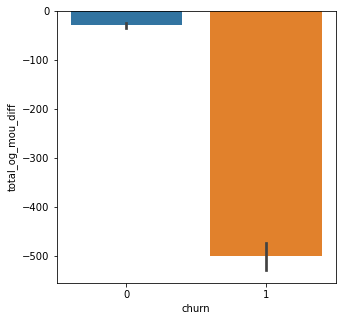

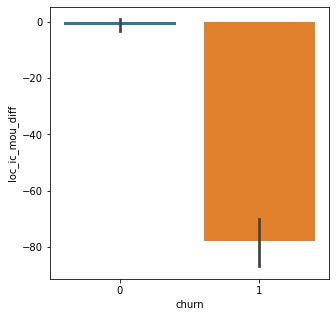

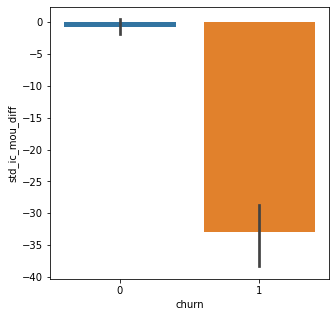

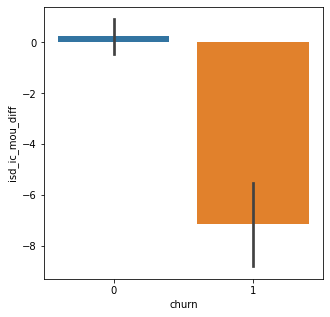

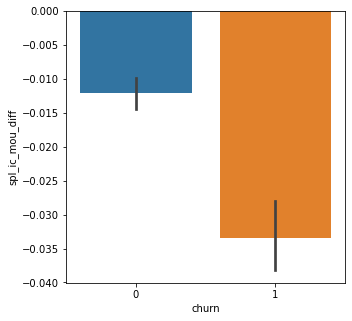

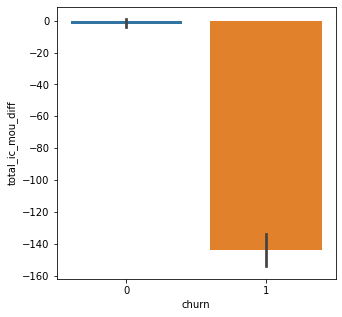

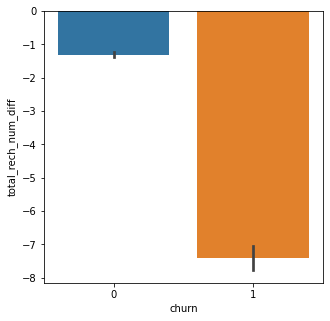

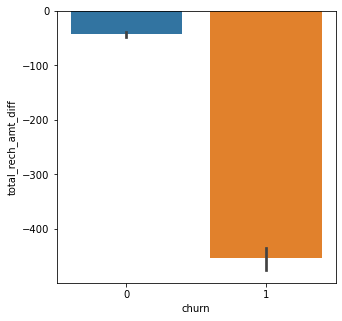

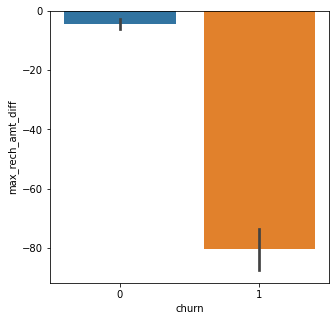

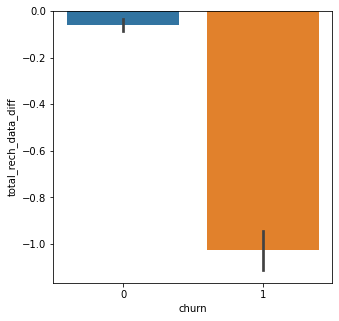

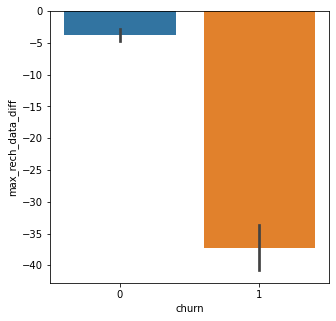

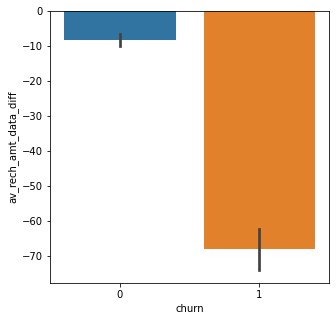

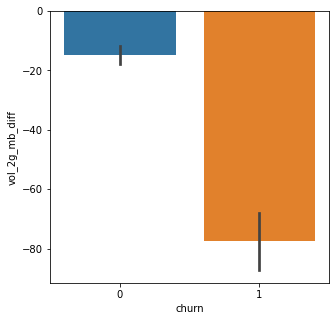

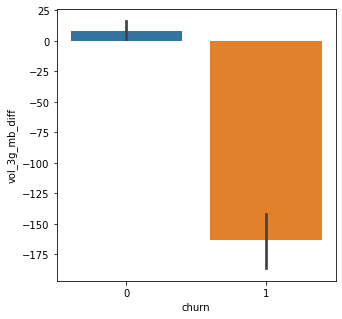

In [30]:
# Plot barplot for each and every columns other than churn 
cont_cols = [col for col in telecom_filter.columns if col not in ['churn']]
for col in cont_cols:
    plt.figure(figsize=(5, 5))
    sns.barplot(x='churn', y=col, data=telecom_filter)
    plt.show()

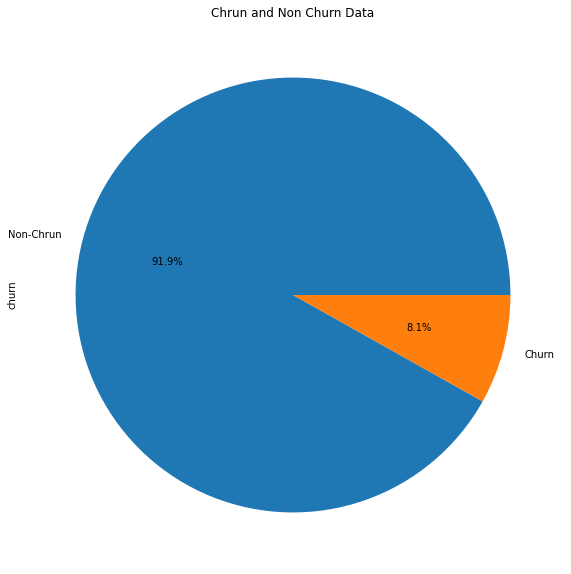

In [31]:
# pie chart for the churn and non churn data 
plt.figure(figsize=(10,10))
labels='Non-Chrun','Churn'
telecom_filter['churn'].value_counts().plot.pie(labels=labels,autopct="%.1f%%")
plt.title('Chrun and Non Churn Data')
plt.show()

### Bivariate analysis

In [32]:
# Common function for bivariate analysis
def bivariate(var1,var2,title=''):
    plt.figure(figsize=(8,8))
    sns.boxplot(var1,var2)
    plt.title(title)
    plt.show()

C:\Users\Vibhor Malik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


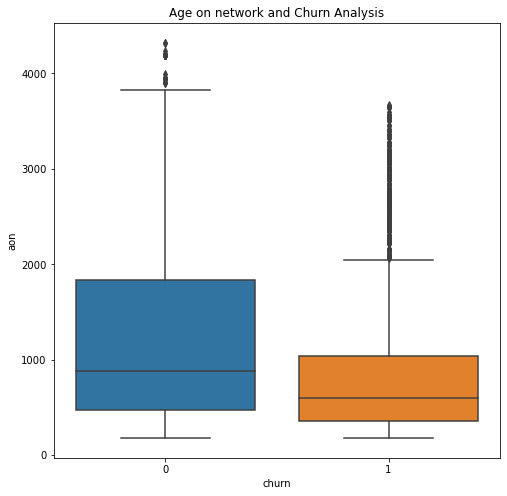

In [33]:
bivariate(telecom_filter['churn'],telecom_filter['aon'],title='Age on network and Churn Analysis')

C:\Users\Vibhor Malik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


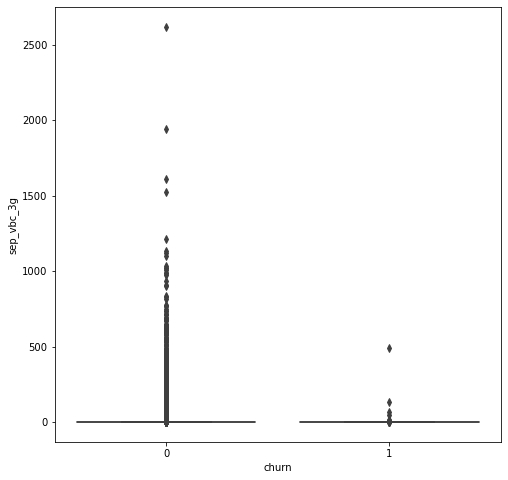

In [34]:
bivariate(telecom_filter['churn'],telecom_filter['sep_vbc_3g'])

C:\Users\Vibhor Malik\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Vibhor Malik\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Vibhor Malik\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


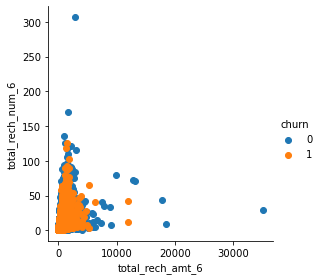

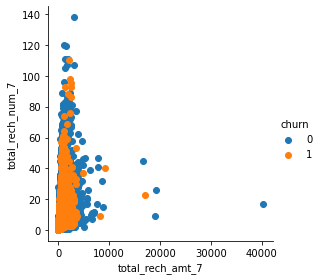

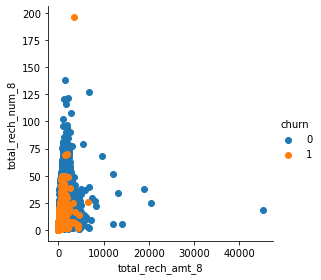

In [35]:
# total_rech_amt vs total_rech_num wise churn and non churn 
sns.FacetGrid(telecom_filter,hue='churn',size=4).map(plt.scatter, "total_rech_amt_6","total_rech_num_6").add_legend()
sns.FacetGrid(telecom_filter,hue='churn',size=4).map(plt.scatter, "total_rech_amt_7","total_rech_num_7").add_legend()
sns.FacetGrid(telecom_filter,hue='churn',size=4).map(plt.scatter, "total_rech_amt_8","total_rech_num_8").add_legend()

### Handling Outliear using the k-sigma technique

In [36]:
# function of K-sigma Technique
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [37]:
num_cols = [column for column in telecom_filter.columns if column not in id_col + date_col + categorical_cols + ['churn']]
telecom_filter[num_cols].describe(include='all')

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,...,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,558.490824,560.782203,508.597957,261.416302,268.397982,235.378852,375.443534,379.745170,338.682670,16.110355,...,-0.013833,-13.430810,-1.812056,-76.249725,-10.598813,-0.138845,-6.467768,-13.085795,-19.896683,-5.733637
std,460.640461,479.776947,501.961981,459.313442,479.690135,457.844464,481.338526,497.826193,479.882371,76.302156,...,0.174520,221.899902,6.755899,418.479122,136.893018,2.214561,78.343307,148.249896,256.114926,624.877555
min,-2258.709000,-2014.045000,-945.808000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-16.280000,-5710.150000,-147.500000,-6950.000000,-3010.000000,-30.500000,-1303.000000,-3486.500000,-4740.925000,-12385.505000
25%,309.865000,309.826000,231.473000,20.010000,18.930000,15.630000,80.710000,78.540000,63.190000,0.000000,...,0.000000,-67.230000,-4.000000,-245.000000,-33.000000,-0.500000,-7.000000,-59.000000,-21.120000,-2.270000
50%,481.694000,480.943000,427.585000,84.580000,82.810000,65.610000,222.540000,220.030000,182.790000,0.000000,...,0.000000,-5.610000,-1.500000,-57.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,699.943000,698.315000,661.491000,290.440000,290.240000,239.960000,487.940000,494.010000,438.890000,0.000000,...,0.000000,44.280000,1.000000,99.500000,25.000000,0.000000,0.000000,9.500000,0.000000,0.000000
max,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,10752.560000,8362.360000,9667.130000,14007.340000,2613.310000,...,4.450000,3485.370000,130.500000,14344.500000,3949.000000,52.500000,1352.000000,1805.000000,8062.295000,15646.390000


In [38]:
telecom_filter[num_cols] = telecom_filter[num_cols].apply(cap_outliers, axis=0)

In [39]:
telecom_filter[num_cols].describe(include='all')

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,...,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,548.190437,550.814573,498.441171,245.135899,251.814909,217.873084,360.381635,363.678175,322.981702,12.324453,...,-0.013693,-12.917269,-1.773654,-77.372231,-9.033386,-0.150244,-6.306859,-13.323290,-20.329083,-9.372739
std,356.617955,361.120770,384.493319,371.205484,387.229760,353.906251,403.772187,412.171856,383.823666,41.750280,...,0.117280,172.748962,5.868877,361.299079,101.208408,1.818767,68.254102,126.482299,187.566599,453.816505
min,-823.430558,-878.548639,-945.808000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.537392,-679.130516,-22.079752,-1331.687092,-421.277866,-6.782528,-241.497690,-457.835482,-788.241461,-1880.366300
25%,309.865000,309.826000,231.473000,20.010000,18.930000,15.630000,80.710000,78.540000,63.190000,0.000000,...,0.000000,-67.230000,-4.000000,-245.000000,-33.000000,-0.500000,-7.000000,-59.000000,-21.120000,-2.270000
50%,481.694000,480.943000,427.585000,84.580000,82.810000,65.610000,222.540000,220.030000,182.790000,0.000000,...,0.000000,-5.610000,-1.500000,-57.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,699.943000,698.315000,661.491000,290.440000,290.240000,239.960000,487.940000,494.010000,438.890000,0.000000,...,0.000000,44.280000,1.000000,99.500000,25.000000,0.000000,0.000000,9.500000,0.000000,0.000000
max,1940.412206,2000.113045,2014.483901,1639.356628,1707.468388,1608.912245,1819.459111,1873.223748,1778.329781,245.016822,...,0.509726,652.268895,18.455640,1179.187642,400.080239,6.504837,228.562154,431.663891,748.448094,1868.899027


In [40]:
telecom_filter['churn'].value_counts()

0    27560
1     2441
Name: churn, dtype: int64

## Modeling 

In [41]:
# change churn to numeric
telecom_filter['churn'] = pd.to_numeric(telecom_filter['churn'])

In [42]:
# divide data into train and test
X = telecom_filter.drop("churn", axis = 1)
y = telecom_filter.churn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = RANDOM_STATE, stratify = y)

In [43]:
# print shapes of train and test sets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(22500, 163)
(22500,)
(7501, 163)
(7501,)


#### PCA 

In [44]:
# PCA Pipeline 
pca = Pipeline([('scaler', StandardScaler()), ('pca', PCA(random_state=RANDOM_STATE))])

In [45]:
pca.fit(X_train)
churn_pca = pca.fit_transform(X_train)

In [46]:
# assigning pca from the pipeline 
pca = pca.named_steps['pca']
# look at explainded variance of PCA components
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0       10.80
1       19.50
2       25.13
3       30.02
4       33.80
        ...  
158     99.99
159    100.00
160    100.00
161    100.00
162    100.00
Length: 163, dtype: float64


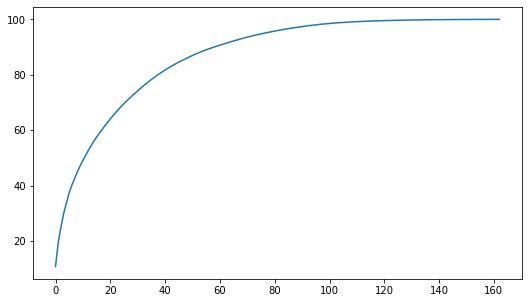

In [47]:
# plot feature variance
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(175/20,100/20)) # 100 elements on y-axis; 175 elements on x-axis; 20 is normalising factor
plt.plot(cumulative_variance)

#### Model  Logistic regression and PCA

In [48]:
# create pipeline
PCA_VARS = 60
pipeline_logit = [('scaler', StandardScaler()),
         ("pca", PCA(n_components=PCA_VARS,random_state=RANDOM_STATE)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
model_logit = Pipeline(pipeline_logit)

In [49]:
# fit model
model_logit.fit(X_train, y_train)

# check score on train data
model_logit.score(X_train, y_train)

0.8067555555555556

#### Evaluation on testing data

In [50]:
# predict churn on test data
y_pred = model_logit.predict(X_test)

# create onfusion matrix
print(confusion_matrix(y_test, y_pred))

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity Score:", round(sensitivity, 2), "\n", "Specificity Score:", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model_logit.predict_proba(X_test)[:, 1]
print("AUC_ROC Score: ", round(roc_auc_score(y_test, y_pred_prob),2))

[[5567 1324]
 [  94  516]]
Sensitivity Score:0.85
Specificity Score:0.81
AUC_ROC Score:  0.9


#### Hyperparameter tuning

In [51]:
# checking the imbalance in feature 
y_train.value_counts()/y_train.shape

0    0.918622
1    0.081378
Name: churn, dtype: float64

In [52]:
# create pipeline
steps = [("scaler", StandardScaler()), 
         ("pca", PCA(random_state=RANDOM_STATE)),
         ("logistic", LogisticRegression(class_weight={0:0.1, 1: 0.9}))
        ]

# compile pipeline
pca_logit = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [60, 80], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=pca_logit, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [53]:
# Fitting the model 
model.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  1.0min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA(random_state=42)),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2'],
                         'pca__n_components': [60, 80]},
             scoring='roc_auc', verbose=1)

In [54]:
# cross validation results
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__C,param_logistic__penalty,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.853612,0.242570,0.000000,0.000000,0.1,l1,60,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,32
1,2.738398,0.224436,0.000000,0.000000,0.1,l1,80,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,20
2,2.942679,0.375704,0.078206,0.037585,0.1,l2,60,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.877664,0.891852,0.880605,0.900823,0.886705,0.887530,0.008263,16
3,3.349596,0.661771,0.082001,0.022100,0.1,l2,80,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.881690,0.896445,0.883855,0.903224,0.892578,0.891559,0.007972,1
4,2.480861,0.364641,0.000000,0.000000,0.5,l1,60,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,23
5,2.756111,0.561216,0.000000,0.000000,0.5,l1,80,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,29
6,2.755214,0.587553,0.076999,0.025036,0.5,l2,60,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",0.877719,0.892069,0.880901,0.900376,0.886869,0.887587,0.008078,15
7,3.287195,0.847474,0.065200,0.017745,0.5,l2,80,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",0.881613,0.896027,0.884111,0.902612,0.892839,0.891440,0.007721,2
8,1.866034,0.515298,0.000000,0.000000,1,l1,60,"{'logistic__C': 1, 'logistic__penalty': 'l1', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
9,2.396376,0.508806,0.000000,0.000000,1,l1,80,"{'logistic__C': 1, 'logistic__penalty': 'l1', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,30


In [55]:
# print best hyperparameters
print("AUC_ROC best Score: ", model.best_score_)
print("hyperparameters best Score: ", model.best_params_)

AUC_ROC best Score:  0.8915585612835807
hyperparameters best Score:  {'logistic__C': 0.1, 'logistic__penalty': 'l2', 'pca__n_components': 80}


In [56]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
print(confusion_matrix(y_test, y_pred))

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity Score: ", round(sensitivity, 2), "\n", "Specificity Score: ", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC_ROC Score:", round(roc_auc_score(y_test, y_pred_prob),2))

[[5850 1041]
 [ 115  495]]
Sensitivity Score: 0.81
Specificity Score: 0.85
AUC_ROC Score: 0.9


#### Random Forest and PCA

In [57]:
# random forest - the class weight is used to handle class imbalance - it adjusts the cost function
tree = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)

# hyperparameter space
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=tree, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [58]:
model.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  3.3min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=RandomForestClassifier(class_weight={0: 0.1, 1: 0.9},
                                              n_jobs=-1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 0.4]},
             scoring='roc_auc', verbose=1)

In [59]:
# print best hyperparameters
print("AUC_ROC Best Score: ", model.best_score_)
print("hyperparameters Best Score: ", model.best_params_)

AUC_ROC Best Score:  0.9294640149742797
hyperparameters Best Score:  {'criterion': 'entropy', 'max_features': 0.4}


#### ii) Model with best features

In [60]:
# run a random forest model on train data
max_features = int(round(np.sqrt(X_train.shape[1])))    # number of variables to consider to split each node
print(max_features)

model = RandomForestClassifier(n_estimators=100, max_features=max_features, class_weight={0:0.1, 1: 0.9}, 
                               oob_score=True, random_state=RANDOM_STATE, verbose=1)

13


In [61]:
# fit model
model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   23.0s finished


RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, max_features=13,
                       oob_score=True, random_state=42, verbose=1)

In [62]:
# OOB score
model.oob_score_

0.9422666666666667

In [63]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
print(confusion_matrix(y_test, y_pred))

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity Score:", round(sensitivity, 2), "\n", "Specificity Score:", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("ROC_AOC Score:", round(roc_auc_score(y_test, y_pred_prob),2))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[[6828   63]
 [ 359  251]]
Sensitivity Score:0.41
Specificity Score:0.99
ROC_AOC Score: 0.93


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


### Stacking important Features 

In [64]:
# predictors
features = telecom_filter.drop('churn', axis=1).columns

# feature_importance
importance = model.feature_importances_

# create dataframe
feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': importance*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]

# sort features
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_importance.importance_percentage.sum())
feature_importance

Sum of importance= 99.99999999999999


,variables,importance_percentage
0,total_ic_mou_8,6.374137
1,arpu_8,4.679461
2,total_og_mou_8,3.829351
3,last_day_rch_amt_8,3.591210
4,total_rech_amt_8,3.530770
...,...,...
158,night_pck_user_7,0.016494
159,og_others_8,0.015813
160,night_pck_user_6,0.014351
161,og_others_7,0.008338


In [65]:
# extract top 'n' features
top_n = 20
top_features = feature_importance.variables[0:top_n]

<AxesSubplot:>

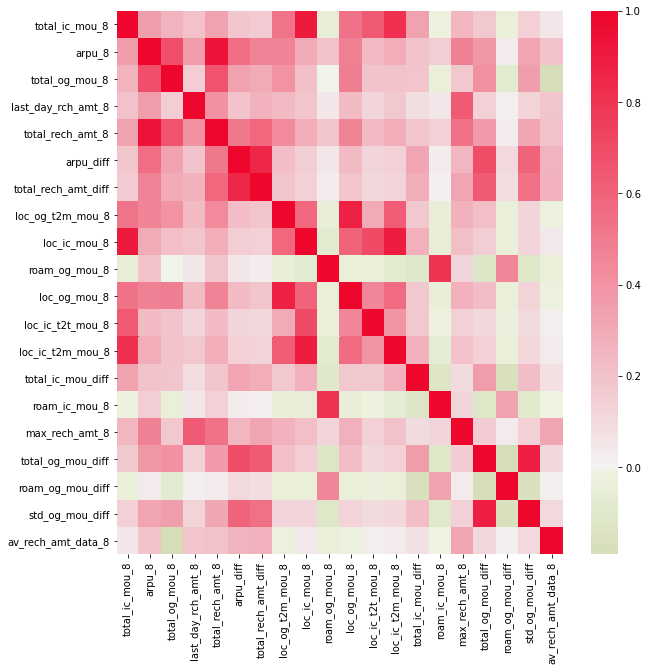

In [66]:
# plot feature correlation
import seaborn as sns
plt.rcParams["figure.figsize"] =(10,10)
mycmap = sns.diverging_palette(100, 10, s=99, center="light", as_cmap=True)
sns.heatmap(data=X_train[top_features].corr(), center=0.0, cmap=mycmap)

In [67]:
# extract top 'n' features
top_n = 10
top_features = feature_importance.variables[0:top_n]

In [68]:
# Opertaion on Top10 features
X_train = X_train[top_features]
X_test = X_test[top_features]

In [69]:
# logistic regression
steps = [('scaler', StandardScaler()), 
         ("logistic", LogisticRegression(class_weight={0:0.1, 1:0.9}))
        ]

# compile pipeline
logit = Pipeline(steps)

# hyperparameter space
params = {'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=logit, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [70]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    1.8s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=1)

In [71]:
# print best hyperparameters
print("AUC_ROC best Score: ", model.best_score_)
print("hyperparameters best Score: ", model.best_params_)

AUC_ROC best Score:  0.8685345879836543
hyperparameters best Score:  {'logistic__C': 10, 'logistic__penalty': 'l2'}


In [72]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
print(confusion_matrix(y_test, y_pred))

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity Score:", round(sensitivity, 2), "\n", "Specificity Score:", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("ROC_AUC Score:", round(roc_auc_score(y_test, y_pred_prob),2))

[[5861 1030]
 [ 133  477]]
Sensitivity Score:0.78
Specificity Score:0.85
ROC_AUC Score: 0.88


### Extract the intercept and the coefficients from the logistic model 

In [73]:
logit = model.best_estimator_.named_steps['logistic']

In [74]:
# intercept
intercept = pd.DataFrame(logit.intercept_.reshape((1,1)), columns = ['intercept'])

In [75]:
# coefficients
coefficients = logit.coef_.reshape((top_n, 1)).tolist()
coefficients = [val for sublist in coefficients for val in sublist]
coefficients = [round(coefficient, 3) for coefficient in coefficients]

logistic_features = list(X_train.columns)
coff = pd.DataFrame(logit.coef_, columns=logistic_features)
pd.concat([intercept, coff], axis=1)

,intercept,total_ic_mou_8,arpu_8,total_og_mou_8,last_day_rch_amt_8,total_rech_amt_8,arpu_diff,total_rech_amt_diff,loc_og_t2m_mou_8,loc_ic_mou_8,roam_og_mou_8
0,-1.361884,-1.83194,-0.082652,-0.039193,-0.421108,0.171516,-0.37813,-0.488931,-0.447581,0.827866,0.322327


### Conclusion

**These are Following observations according to the as Follows:-** 
- arpu_8 :- from this we observe the avg revenue in sept is lower for the high churn rate 
- total_ic_mou_8 :- from this we observe the international calls in sept is lower in case of high churn rate 
- total_og_mou_8 :- from this we observe if the customers total outgoing call in sept is less then the higher chance of churn 
- last_day_rch_amt_8 :- from this we observe that the last recharge in sept is less then high chance of churn rate 
- total_rech_amt_8 :- from this we observe the total recharge amount is present in sept then churn rate is high 
- arpu_diff:- from this we observe that average revenue difference is less compared to july and august then there is high chance of churn
- total_rech_amt_diff :- from this we observe we observe the 8th month recharge is less as compared to 6,7 th month
- loc_og_t2m_mou_8 :- Local outgoing is less in case or churn in 8th month as compared to other months 
- roam_og_mou_8:- romaing outgoing is less in case or churn in 8th month as compared to other months 

## Business Recommendation 

- Company Needs to pay attention to romaing rates. This might be the reason for the churning because customer don't want to pay more for roaming. Company also provide offer for the customers using roaming services.

- Company needs to focus on the ISD rates may be it is too high which company provides as compared to competitor. 

- The Company collects the customer query and complaint data and work with their services in order to retain the current customer.